In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_9315/4245898435.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
arpajon = pd.read_csv("ARPAJON.csv")
chilly = pd.read_csv("CHILLY.csv")
corbeil = pd.read_csv("CORBEIL.csv")
monygeron = pd.read_csv("MONYGERON.csv")
turnover_chilly = pd.read_excel("2023_total.xlsx")

In [3]:
turnover_chilly

date  turnover  consumption        t/c  00:00-00:59  01:00-01:59  \
0   2023-01-01   9934.41    245.74080  40.426376          NaN          NaN   
1   2023-01-02   5747.68    245.84319  23.379456          NaN          NaN   
2   2023-01-03   7725.74    239.08203  32.314181          NaN          NaN   
3   2023-01-04   7104.01    210.10335  33.811979          NaN          NaN   
4   2023-01-05   7637.02    206.66058  36.954411          NaN          NaN   
..         ...       ...          ...        ...          ...          ...   
301 2023-11-26   9318.64    247.26147  37.687392          NaN          NaN   
302 2023-11-27   5649.23    186.87960  30.229249          NaN          NaN   
303 2023-11-28   7959.87    248.43450  32.040115          NaN          NaN   
304 2023-11-29   7382.86    213.53424  34.574596          NaN          NaN   
305 2023-11-30   7062.16    207.59346  34.019183          NaN          NaN   

     02:00-02:59  03:00-03:59  04:00-04:59  05:00-05:59  ...  14:00-14:59  \
0            NaN          NaN          NaN          NaN  ...       626.85   
1            NaN          NaN          NaN          NaN  ...       524.04   
2            NaN          NaN          NaN          NaN  ...       317.03   
3            NaN          NaN          NaN          NaN  ...       642.57   
4            NaN          NaN          NaN          NaN  ...       263.28   
..           ...          ...          ...          ...  ...          ...   
301          NaN          NaN          NaN          NaN  ...      1028.82   
302          NaN          NaN          NaN          NaN  ...       455.88   
303          NaN          NaN          NaN          NaN  ...       302.55   
304          NaN          NaN          NaN          NaN  ...       415.50   
305          NaN          NaN          NaN          NaN  ...       167.24   

     15:00-15:59  16:00-16:59  17:00-17:59  18:00-18:59  19:00-19:59  \
0         658.81       552.19       453.34      1151.84      1981.82   
1         308.69       254.80       420.15       533.64       806.62   
2         260.38       324.12       345.30       875.38      1521.55   
3         434.27       194.35       181.82       510.40      1106.30   
4         280.71       176.06       452.32       931.78      1137.74   
..           ...          ...          ...          ...          ...   
301       523.17       455.59       467.19       941.92      1452.18   
302       300.44        47.18       143.09       297.01      1226.49   
303       195.00       170.11       301.77       530.52      1695.96   
304       258.82       180.63       239.36       788.37      1023.25   
305       164.81       160.18       293.99       893.28       948.47   

     20:00-20:59  21:00-21:59  22:00-22:59  23:00-23:59  
0        1154.82       512.42       240.97          NaN  
1        1008.20       318.63       240.81          NaN  
2         884.84       539.33       310.63          NaN  
3        1161.30       449.46       182.24          NaN  
4        1319.03       561.27       376.07          NaN  
..           ...          ...          ...          ...  
301      1186.46       612.73       208.99          NaN  
302       794.37       446.89       154.71          NaN  
303      1378.34       710.72       435.80          NaN  
304       823.23       602.66       265.41        31.95  
305      1131.15       490.44       431.76          NaN  

[306 rows x 28 columns]

In [4]:
row_to_T = {}
for i in range(turnover_chilly.shape[0]):
    row_to_T[i] = turnover_chilly.iloc[i,4:].to_frame()
    row_to_T[i].columns=['Transaction']

In [5]:
import pandas as pd

# Define the start and end dates
start_date = '2023-01-01 00:00'
end_date = '2023-12-31 23:00'  # End of the year

# Create a date range with hourly frequency
date_range = pd.date_range(start=start_date, end=end_date, freq='h')

# Create the DataFrame with the specified index
dataset = pd.DataFrame(columns=['DateTime', 'Transaction'])
dataset['DateTime'] = date_range

# Filter out rows corresponding to February and December
dataset = dataset[~dataset['DateTime'].dt.month.isin([2, 12])]



In [6]:
dataset

DateTime Transaction
0    2023-01-01 00:00:00         NaN
1    2023-01-01 01:00:00         NaN
2    2023-01-01 02:00:00         NaN
3    2023-01-01 03:00:00         NaN
4    2023-01-01 04:00:00         NaN
...                  ...         ...
8011 2023-11-30 19:00:00         NaN
8012 2023-11-30 20:00:00         NaN
8013 2023-11-30 21:00:00         NaN
8014 2023-11-30 22:00:00         NaN
8015 2023-11-30 23:00:00         NaN

[7344 rows x 2 columns]

In [7]:
dataset.iloc[0:24,1] = row_to_T[0].iloc[:,0]

In [8]:
for i in range(turnover_chilly.shape[0]):
    dataset.iloc[i*24:(i+1)*24,1] = row_to_T[i].iloc[:,0]

In [9]:
dataset

DateTime Transaction
0    2023-01-01 00:00:00         NaN
1    2023-01-01 01:00:00         NaN
2    2023-01-01 02:00:00         NaN
3    2023-01-01 03:00:00         NaN
4    2023-01-01 04:00:00         NaN
...                  ...         ...
8011 2023-11-30 19:00:00      948.47
8012 2023-11-30 20:00:00     1131.15
8013 2023-11-30 21:00:00      490.44
8014 2023-11-30 22:00:00      431.76
8015 2023-11-30 23:00:00         NaN

[7344 rows x 2 columns]

In [10]:
k1 = pd.read_csv("Chilly Kitchen/kitchen January.csv")
k3 = pd.read_csv("Chilly Kitchen/kitchen March.csv")
k4 = pd.read_csv("Chilly Kitchen/kitchen April.csv")
k5 = pd.read_csv("Chilly Kitchen/kitchen May.csv")
k6 = pd.read_csv("Chilly Kitchen/kitchen June.csv")
k7 = pd.read_csv("Chilly Kitchen/kitchen July.csv")
k8 = pd.read_csv("Chilly Kitchen/kitchen August.csv")
k9 = pd.read_csv("Chilly Kitchen/kitchen September.csv")
k10 = pd.read_csv("Chilly Kitchen/kitchen October.csv")
k11 = pd.read_csv("Chilly Kitchen/kitchen November.csv")

In [11]:
k3

DateTime  Maintien au chaud HC1 (Wh)  Friteuse Fish (Wh)  \
0    2023-03-01 00:00                         0.0                 0.0   
1    2023-03-01 01:00                         0.0                 0.0   
2    2023-03-01 02:00                         0.0                 0.0   
3    2023-03-01 03:00                         0.0                 0.0   
4    2023-03-01 04:00                         0.0                 0.0   
..                ...                         ...                 ...   
709  2023-03-31 19:00                      1106.3              1276.5   
710  2023-03-31 20:00                      1184.5              1511.1   
711  2023-03-31 21:00                      1133.9              1062.6   
712  2023-03-31 22:00                      1145.4               938.4   
713  2023-03-31 23:00                      1179.9               897.0   

     Friteuse HP Poulet 2 (Wh)  Friteuse HP Poulet 1 (Wh)  \
0                         0.00                        0.0   
1                         0.00                        0.0   
2                         0.00                        0.0   
3                         6.90                        0.0   
4                         0.00                        0.0   
..                         ...                        ...   
709                    4747.17                     3650.1   
710                    3884.73                     3525.9   
711                     600.27                      800.4   
712                    2028.63                      248.4   
713                    2311.50                     1455.9   

     Friteuse Poulet 3 (Wh)  Friteuse Frites 1 (Wh)  \
0                       0.0                     0.0   
1                       0.0                     0.0   
2                       0.0                     0.0   
3                       0.0                     0.0   
4                       0.0                     0.0   
..                      ...                     ...   
709                  6072.0                  6037.5   
710                  4008.9                  7583.1   
711                  2014.8                  4912.8   
712                  3726.0                  4512.6   
713                  1262.7                  3567.3   

     Inconnu et négligeable (Wh)  Friteuse Poulet 5 (Wh)  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
..                           ...                     ...   
709                          6.9                  3360.3   
710                          0.0                  6768.9   
711                          0.0                  3084.3   
712                          0.0                  3049.8   
713                          0.0                  1911.3   

     Friteuse Frites 3 (Wh)  Four Cookies (Wh)  Friteuse Poulet 4 (Wh)  \
0                       0.0               0.00                     0.0   
1                       6.9               0.00                     0.0   
2                       0.0               0.00                     0.0   
3                       0.0               6.90                     0.0   
4                       0.0               0.00                     0.0   
..                      ...                ...                     ...   
709                    27.6             124.05                  3505.2   
710                    27.6             124.14                  5444.1   
711                    20.7            2890.95                   938.4   
712                    27.6             496.74                  1593.9   
713                    27.6             124.08                   365.7   

     Friteuse Frites 2 (Wh)  
0                       0.0  
1                       0.0  
2                       0.0  
3           

In [12]:
k1['DateTime'] = pd.to_datetime(k1['DateTime'])
k3['DateTime'] = pd.to_datetime(k3['DateTime'])
k4['DateTime'] = pd.to_datetime(k4['DateTime'])
k5['DateTime'] = pd.to_datetime(k5['DateTime'])
k6['DateTime'] = pd.to_datetime(k6['DateTime'])
k7['DateTime'] = pd.to_datetime(k7['DateTime'])
k8['DateTime'] = pd.to_datetime(k8['DateTime'])
k9['DateTime'] = pd.to_datetime(k9['DateTime'])
k10['DateTime'] = pd.to_datetime(k10['DateTime'])
k11['DateTime'] = pd.to_datetime(k11['DateTime'])
k = pd.concat([k1,k3,k4,k5,k6,k7,k8,k9,k10,k11])


In [13]:
k

DateTime  Maintien au chaud HC1 (Wh)  Friteuse Fish (Wh)  \
0   2023-01-01 00:00:00                         0.0                 6.9   
1   2023-01-01 01:00:00                         0.0                 0.0   
2   2023-01-01 02:00:00                         0.0                 0.0   
3   2023-01-01 03:00:00                         0.0                 0.0   
4   2023-01-01 04:00:00                         0.0                 0.0   
..                  ...                         ...                 ...   
714 2023-11-30 19:00:00                      1207.5              1297.2   
715 2023-11-30 20:00:00                      1225.9               952.2   
716 2023-11-30 21:00:00                      1221.3               917.7   
717 2023-11-30 22:00:00                      1209.8               966.0   
718 2023-11-30 23:00:00                       998.2               641.7   

     Friteuse HP Poulet 2 (Wh)  Friteuse HP Poulet 1 (Wh)  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
..                         ...                        ...   
714                     3525.9                       89.7   
715                      759.0                       89.7   
716                      703.8                       89.7   
717                     2566.8                       89.7   
718                     1110.9                       82.8   

     Friteuse Poulet 3 (Wh)  Friteuse Frites 1 (Wh)  \
0                      0.00                     6.9   
1                      0.00                     0.0   
2                      0.00                     0.0   
3                      0.00                     0.0   
4                      0.00                     0.0   
..                      ...                     ...   
714                 4974.87                  4416.0   
715                   20.73                  4988.7   
716                 3070.50                  3636.3   
717                 2159.70                  3022.2   
718                  351.90                  1545.6   

     Inconnu et négligeable (Wh)  Friteuse Poulet 5 (Wh)  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
..                           ...                     ...   
714                          0.0                     0.0   
715                          0.0                     0.0   
716                          0.0                     0.0   
717                          0.0                     0.0   
718                          0.0                     0.0   

     Friteuse Frites 3 (Wh)  Four Cookies (Wh)  Friteuse Poulet 4 (Wh)  \
0                      0.00                0.0                    0.00   
1                      0.00                0.0                    0.00   
2                      0.00                0.0                    0.00   
3                      0.00                0.0                    0.00   
4                      0.00                0.0                    0.00   
..                      ...                ...                     ...   
714                 2152.77              124.2                 5713.17   
715                 3394.83              124.2                  993.63   
716                  959.10              117.3                 2622.00   
717                 1738.80             1504.2                 1690.50   
718                  420.90              117.3                 1124.70   

     Friteuse Frites 2 (Wh)  
0                       0.0  
1                       0.0  
2                   

In [14]:
dataset = pd.merge(dataset,k, on = 'DateTime', how = 'left')

In [15]:
dataset

DateTime Transaction  Maintien au chaud HC1 (Wh)  \
0    2023-01-01 00:00:00         NaN                         0.0   
1    2023-01-01 01:00:00         NaN                         0.0   
2    2023-01-01 02:00:00         NaN                         0.0   
3    2023-01-01 03:00:00         NaN                         0.0   
4    2023-01-01 04:00:00         NaN                         0.0   
...                  ...         ...                         ...   
7339 2023-11-30 19:00:00      948.47                      1207.5   
7340 2023-11-30 20:00:00     1131.15                      1225.9   
7341 2023-11-30 21:00:00      490.44                      1221.3   
7342 2023-11-30 22:00:00      431.76                      1209.8   
7343 2023-11-30 23:00:00         NaN                       998.2   

      Friteuse Fish (Wh)  Friteuse HP Poulet 2 (Wh)  \
0                    6.9                        0.0   
1                    0.0                        0.0   
2                    0.0                        0.0   
3                    0.0                        0.0   
4                    0.0                        0.0   
...                  ...                        ...   
7339              1297.2                     3525.9   
7340               952.2                      759.0   
7341               917.7                      703.8   
7342               966.0                     2566.8   
7343               641.7                     1110.9   

      Friteuse HP Poulet 1 (Wh)  Friteuse Poulet 3 (Wh)  \
0                           0.0                    0.00   
1                           0.0                    0.00   
2                           0.0                    0.00   
3                           0.0                    0.00   
4                           0.0                    0.00   
...                         ...                     ...   
7339                       89.7                 4974.87   
7340                       89.7                   20.73   
7341                       89.7                 3070.50   
7342                       89.7                 2159.70   
7343                       82.8                  351.90   

      Friteuse Frites 1 (Wh)  Inconnu et négligeable (Wh)  \
0                        6.9                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   
...                      ...                          ...   
7339                  4416.0                          0.0   
7340                  4988.7                          0.0   
7341                  3636.3                          0.0   
7342                  3022.2                          0.0   
7343                  1545.6                          0.0   

      Friteuse Poulet 5 (Wh)  Friteuse Frites 3 (Wh)  Four Cookies (Wh)  \
0                        0.0                    0.00                0.0   
1                        0.0                    0.00                0.0   
2                        0.0                    0.00                0.0   
3                        0.0                    0.00                0.0   
4                        0.0                    0.00                0.0   
...                      ...                     ...                ...   
7339                     0.0                 2152.77              124.2   
7340                     0.0                 3394.83              124.2   
7341                     0.0                  959.10              117.3   
7342                     0.0                 1738.80             1504.2   
7343                     0.0                  420.90              117.3   

      Friteuse Poulet 4 (Wh)  Friteuse Frites 2 (Wh)  
0                       0.00                     0.0  
1                       0.00                     0.0  
2                       0.00  

Here we get a dataset contains the transaction data and energy consumption data hourly in 2023

In [16]:
dataset = dataset.fillna(0)

/var/folders/sy/vmc9d9hj20b8m5tcq23j8d7r0000gn/T/ipykernel_9315/2180644426.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.fillna(0)


In [17]:
dataset.to_csv("turnover_energy.csv")

In [18]:
dataset

DateTime  Transaction  Maintien au chaud HC1 (Wh)  \
0    2023-01-01 00:00:00         0.00                         0.0   
1    2023-01-01 01:00:00         0.00                         0.0   
2    2023-01-01 02:00:00         0.00                         0.0   
3    2023-01-01 03:00:00         0.00                         0.0   
4    2023-01-01 04:00:00         0.00                         0.0   
...                  ...          ...                         ...   
7339 2023-11-30 19:00:00       948.47                      1207.5   
7340 2023-11-30 20:00:00      1131.15                      1225.9   
7341 2023-11-30 21:00:00       490.44                      1221.3   
7342 2023-11-30 22:00:00       431.76                      1209.8   
7343 2023-11-30 23:00:00         0.00                       998.2   

      Friteuse Fish (Wh)  Friteuse HP Poulet 2 (Wh)  \
0                    6.9                        0.0   
1                    0.0                        0.0   
2                    0.0                        0.0   
3                    0.0                        0.0   
4                    0.0                        0.0   
...                  ...                        ...   
7339              1297.2                     3525.9   
7340               952.2                      759.0   
7341               917.7                      703.8   
7342               966.0                     2566.8   
7343               641.7                     1110.9   

      Friteuse HP Poulet 1 (Wh)  Friteuse Poulet 3 (Wh)  \
0                           0.0                    0.00   
1                           0.0                    0.00   
2                           0.0                    0.00   
3                           0.0                    0.00   
4                           0.0                    0.00   
...                         ...                     ...   
7339                       89.7                 4974.87   
7340                       89.7                   20.73   
7341                       89.7                 3070.50   
7342                       89.7                 2159.70   
7343                       82.8                  351.90   

      Friteuse Frites 1 (Wh)  Inconnu et négligeable (Wh)  \
0                        6.9                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   
...                      ...                          ...   
7339                  4416.0                          0.0   
7340                  4988.7                          0.0   
7341                  3636.3                          0.0   
7342                  3022.2                          0.0   
7343                  1545.6                          0.0   

      Friteuse Poulet 5 (Wh)  Friteuse Frites 3 (Wh)  Four Cookies (Wh)  \
0                        0.0                    0.00                0.0   
1                        0.0                    0.00                0.0   
2                        0.0                    0.00                0.0   
3                        0.0                    0.00                0.0   
4                        0.0                    0.00                0.0   
...                      ...                     ...                ...   
7339                     0.0                 2152.77              124.2   
7340                     0.0                 3394.83              124.2   
7341                     0.0                  959.10              117.3   
7342                     0.0                 1738.80             1504.2   
7343                     0.0                  420.90              117.3   

      Friteuse Poulet 4 (Wh)  Friteuse Frites 2 (Wh)  
0                       0.00                     0.0  
1                       0.00                     0.0  
2                 

In [19]:
sub_datasets = [dataset.iloc[i::24] for i in range(24)]

In [20]:
sub_datasets[0]

DateTime  Transaction  Maintien au chaud HC1 (Wh)  Friteuse Fish (Wh)  \
0    2023-01-01          0.0                         0.0                 6.9   
24   2023-01-02          0.0                         0.0                 0.0   
48   2023-01-03          0.0                         0.0                 0.0   
72   2023-01-04          0.0                         0.0                 0.0   
96   2023-01-05          0.0                         0.0                 0.0   
...         ...          ...                         ...                 ...   
7224 2023-11-26          0.0                       717.6              1021.2   
7248 2023-11-27          0.0                        27.6                62.1   
7272 2023-11-28          0.0                       202.4                69.0   
7296 2023-11-29          0.0                       296.7                41.4   
7320 2023-11-30          0.0                       223.1                41.4   

      Friteuse HP Poulet 2 (Wh)  Friteuse HP Poulet 1 (Wh)  \
0                           0.0                        0.0   
24                          0.0                        0.0   
48                          0.0                        0.0   
72                          0.0                        0.0   
96                          0.0                        0.0   
...                         ...                        ...   
7224                     1435.2                       82.8   
7248                       96.6                       89.7   
7272                       89.7                       89.7   
7296                       48.3                       55.2   
7320                       62.1                       62.1   

      Friteuse Poulet 3 (Wh)  Friteuse Frites 1 (Wh)  \
0                       0.00                     6.9   
24                      0.00                     0.0   
48                      0.00                     0.0   
72                      0.00                     0.0   
96                      0.00                     0.0   
...                      ...                     ...   
7224                  841.80                  1317.9   
7248                   13.80                   890.1   
7272                   13.80                    55.2   
7296                    6.90                   469.2   
7320                   13.83                    41.4   

      Inconnu et négligeable (Wh)  Friteuse Poulet 5 (Wh)  \
0                             0.0                     0.0   
24                            0.0                     0.0   
48                            0.0                     0.0   
72                            0.0                     0.0   
96                            0.0                     0.0   
...                           ...                     ...   
7224                          0.0                  1235.1   
7248                          0.0                     0.0   
7272                          0.0                     0.0   
7296                          0.0                     0.0   
7320                          0.0                     0.0   

      Friteuse Frites 3 (Wh)  Four Cookies (Wh)  Friteuse Poulet 4 (Wh)  \
0                       0.00                0.0                     0.0   
24                      0.00                0.0                     0.0   
48                      0.00                0.0                     0.0   
72                      0.00                0.0                     0.0   
96                      0.00                0.0                     0.0   
...                      ...                ...                     ...   
7224                  565.80              124.2                  1662.9   
7248                   27.60              124.2                     0.0   
7272                   34.50               55.2                     0.0   
7296                   20.70               62.1                     0.0   
7320                   20.73               82.8                     0.

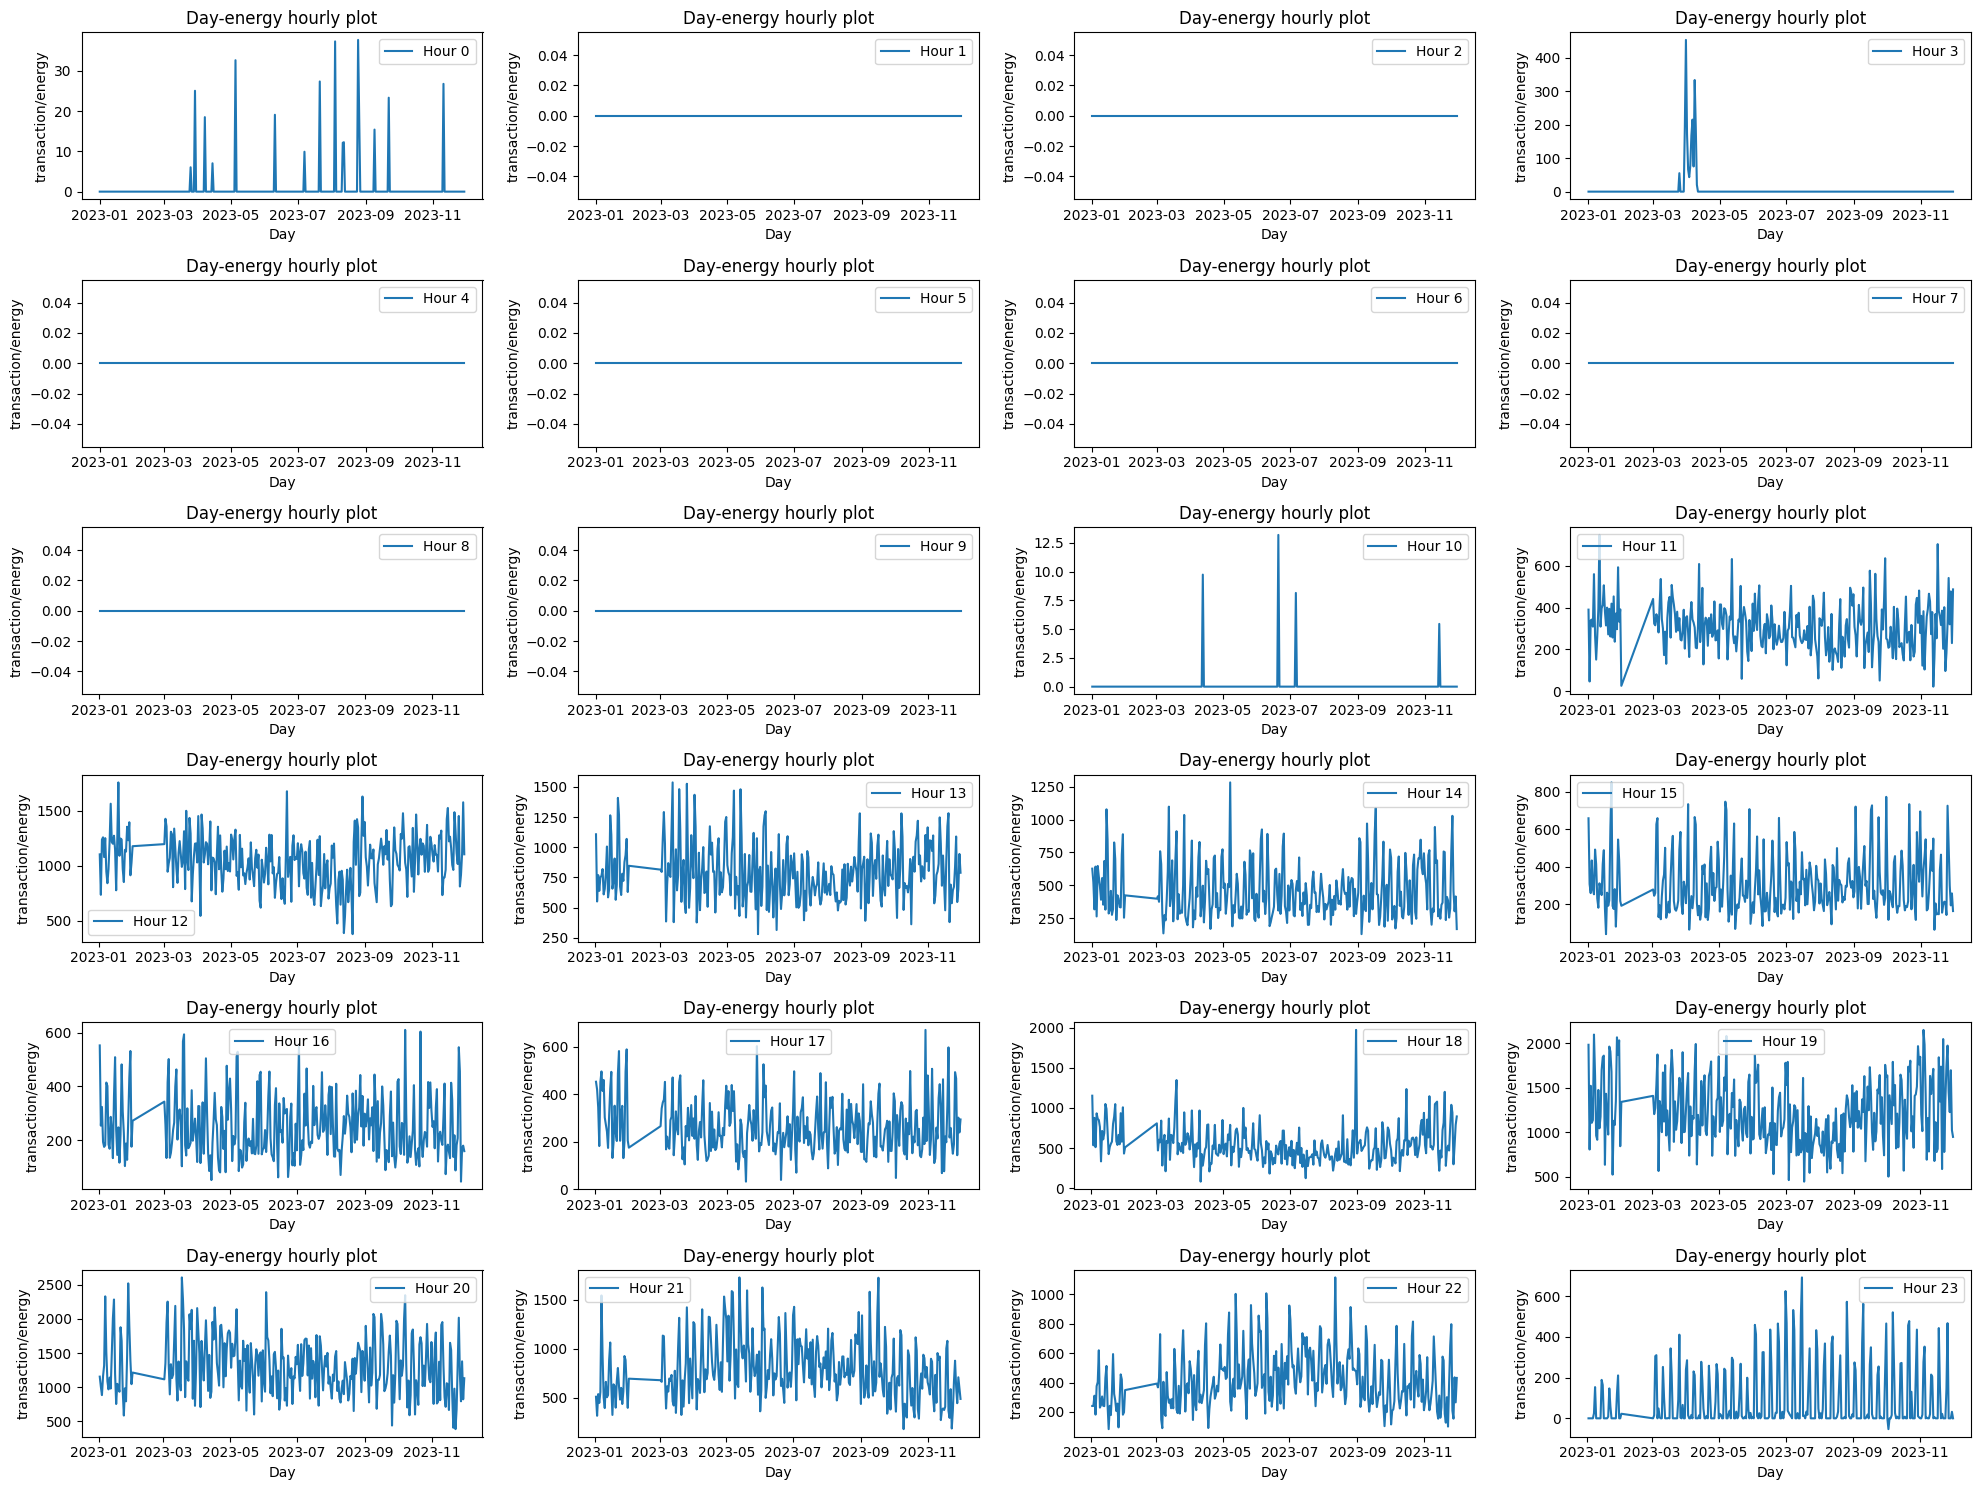

In [95]:

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Transaction'] ,
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


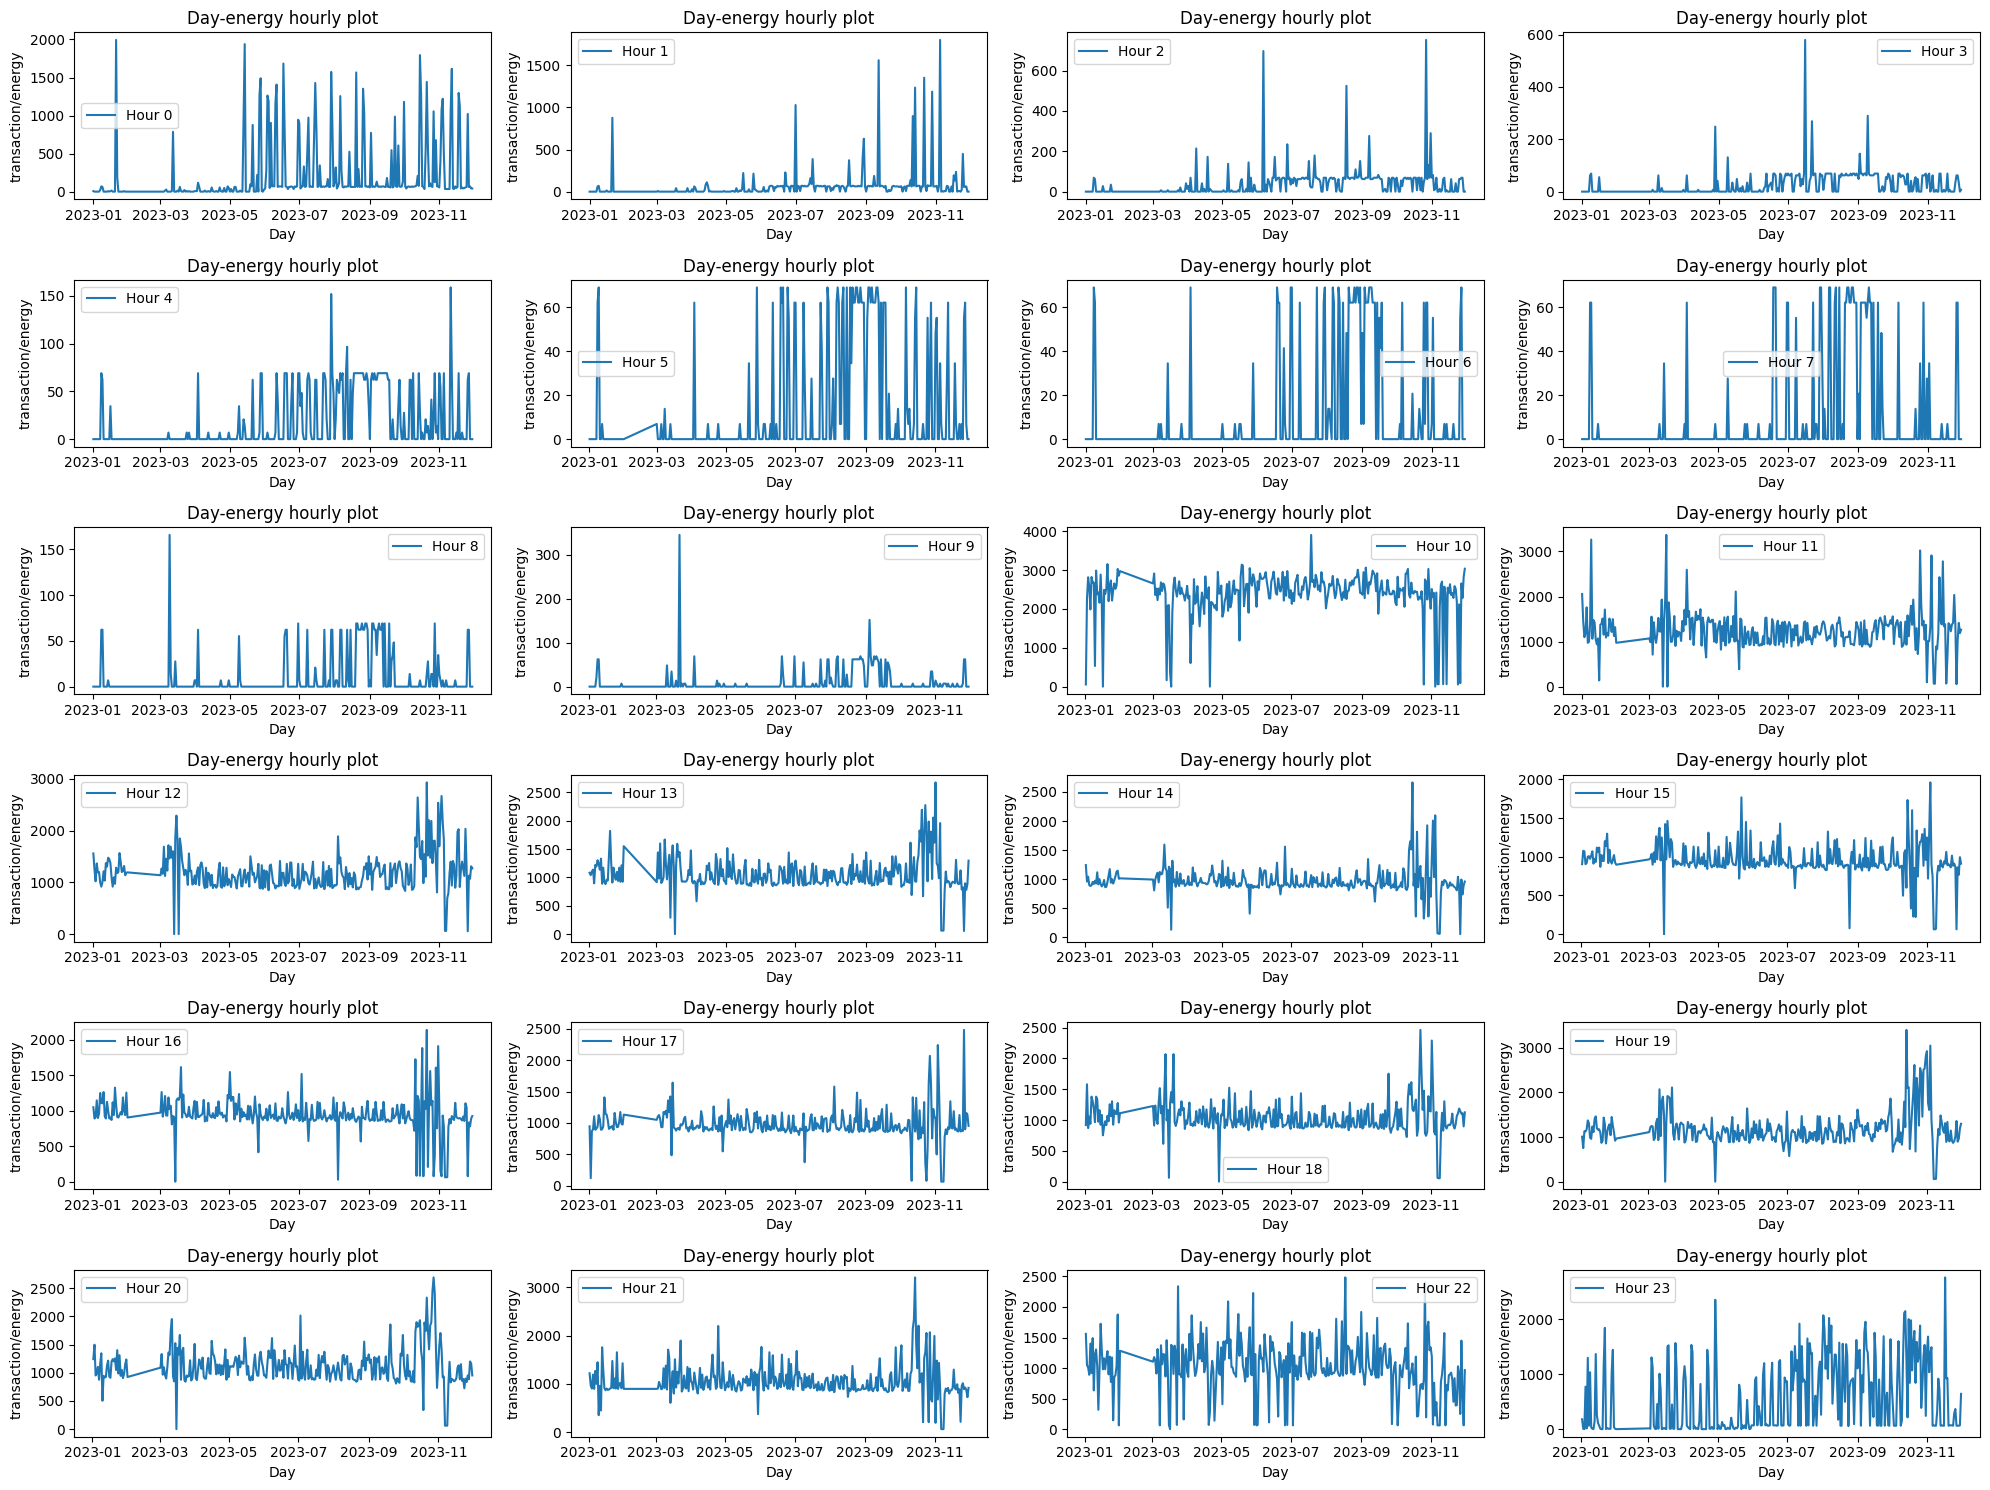

In [22]:

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Friteuse Fish (Wh)'],
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


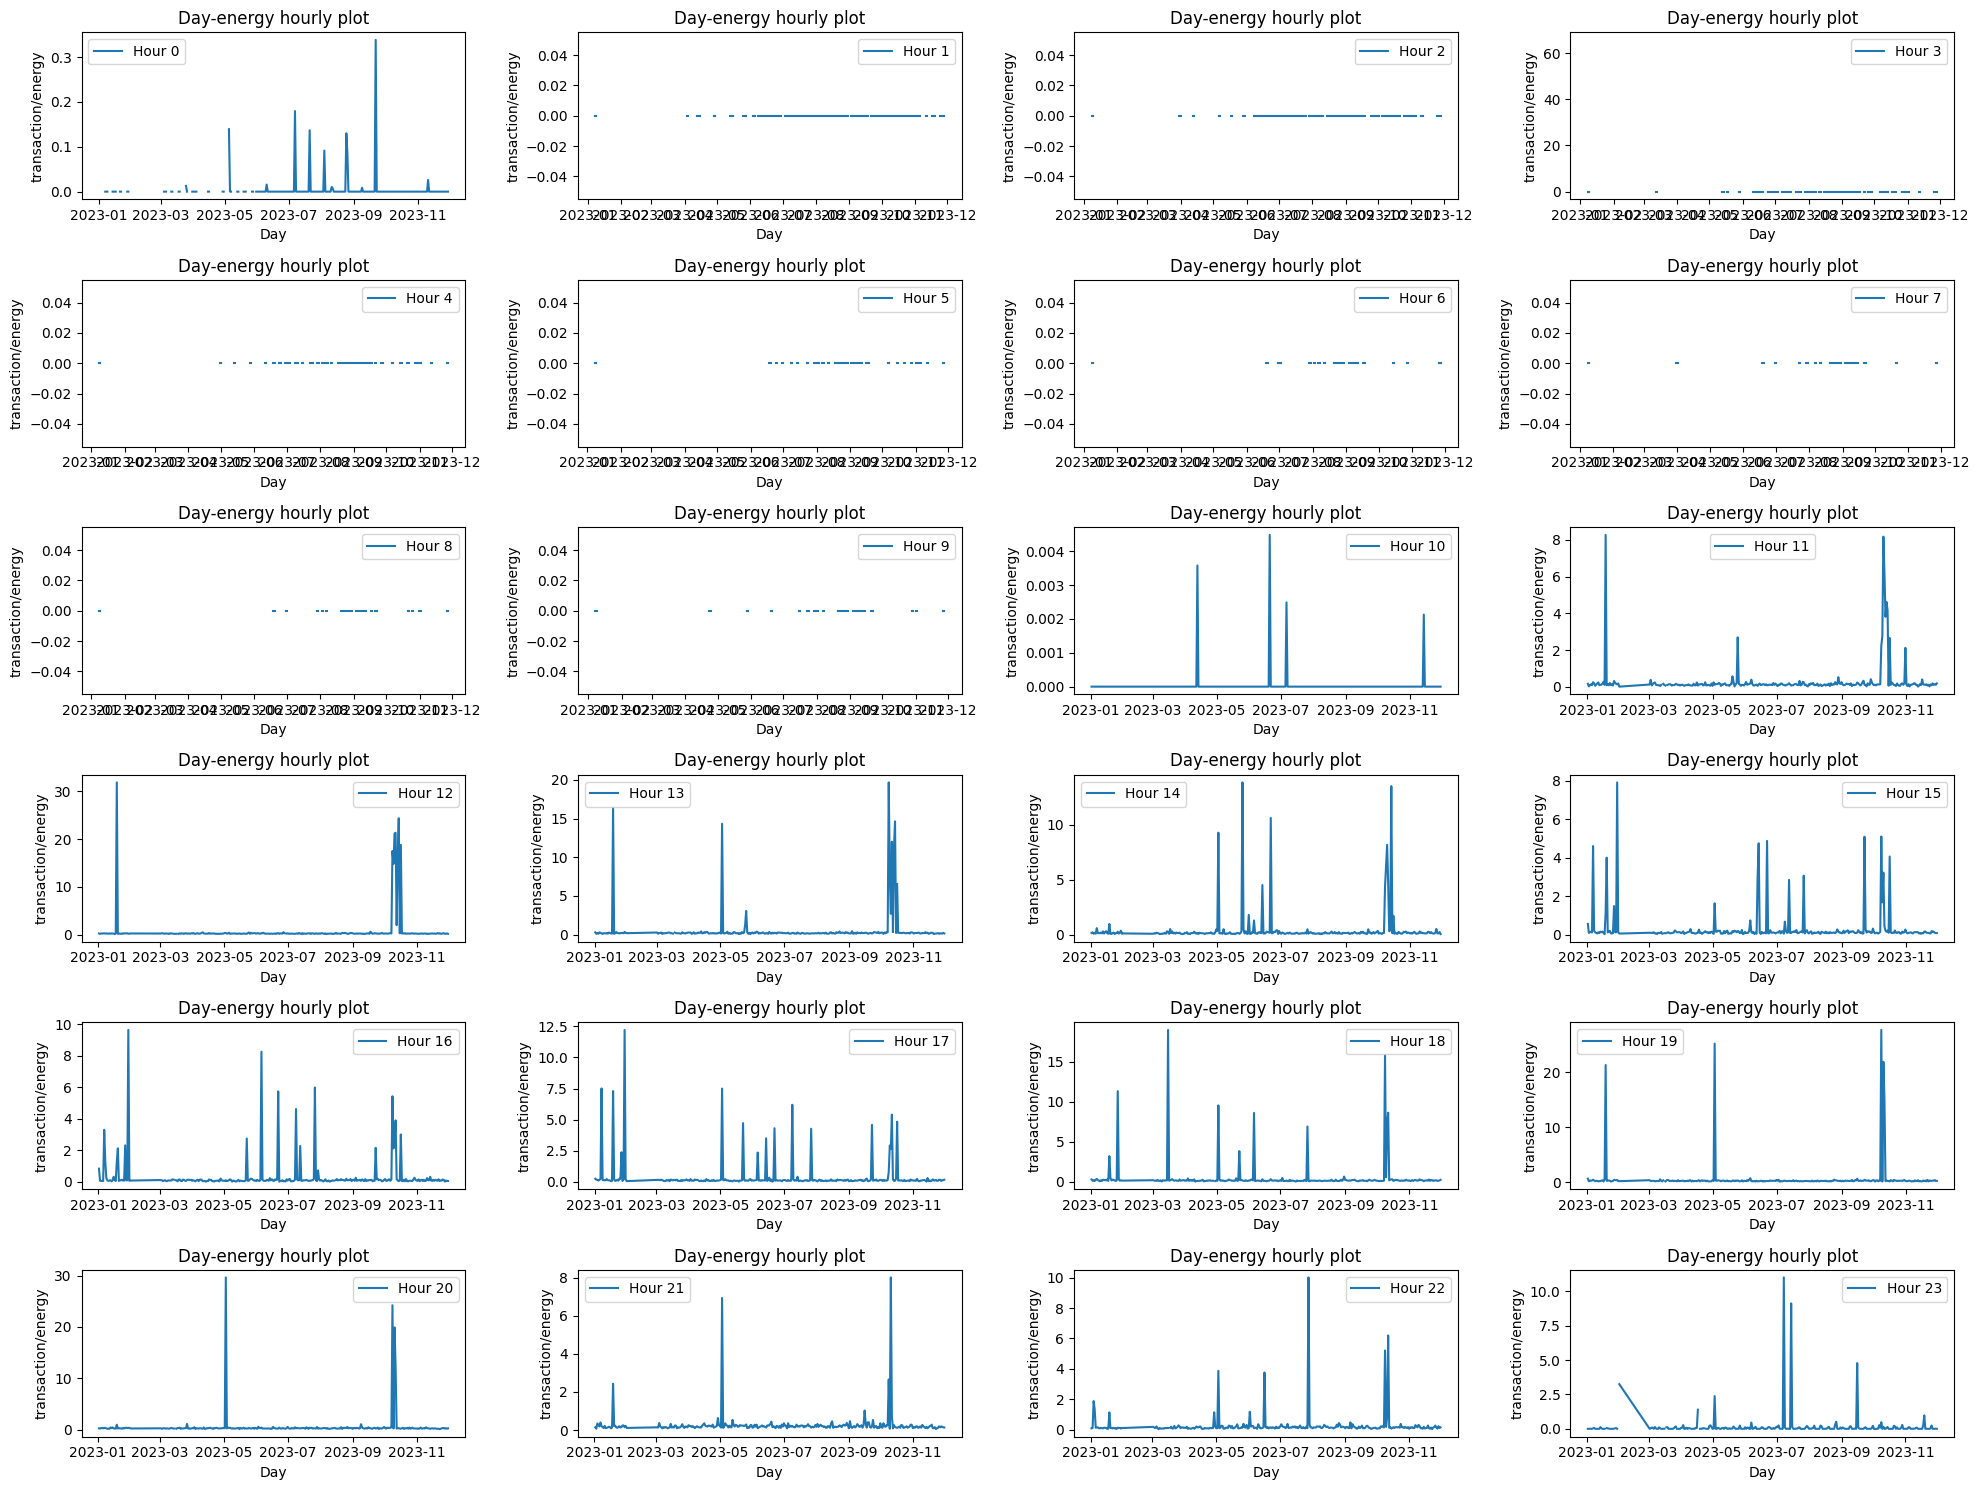

In [23]:
import matplotlib.pyplot as plt

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Transaction'] / sub_df['Friteuse Frites 1 (Wh)'],
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


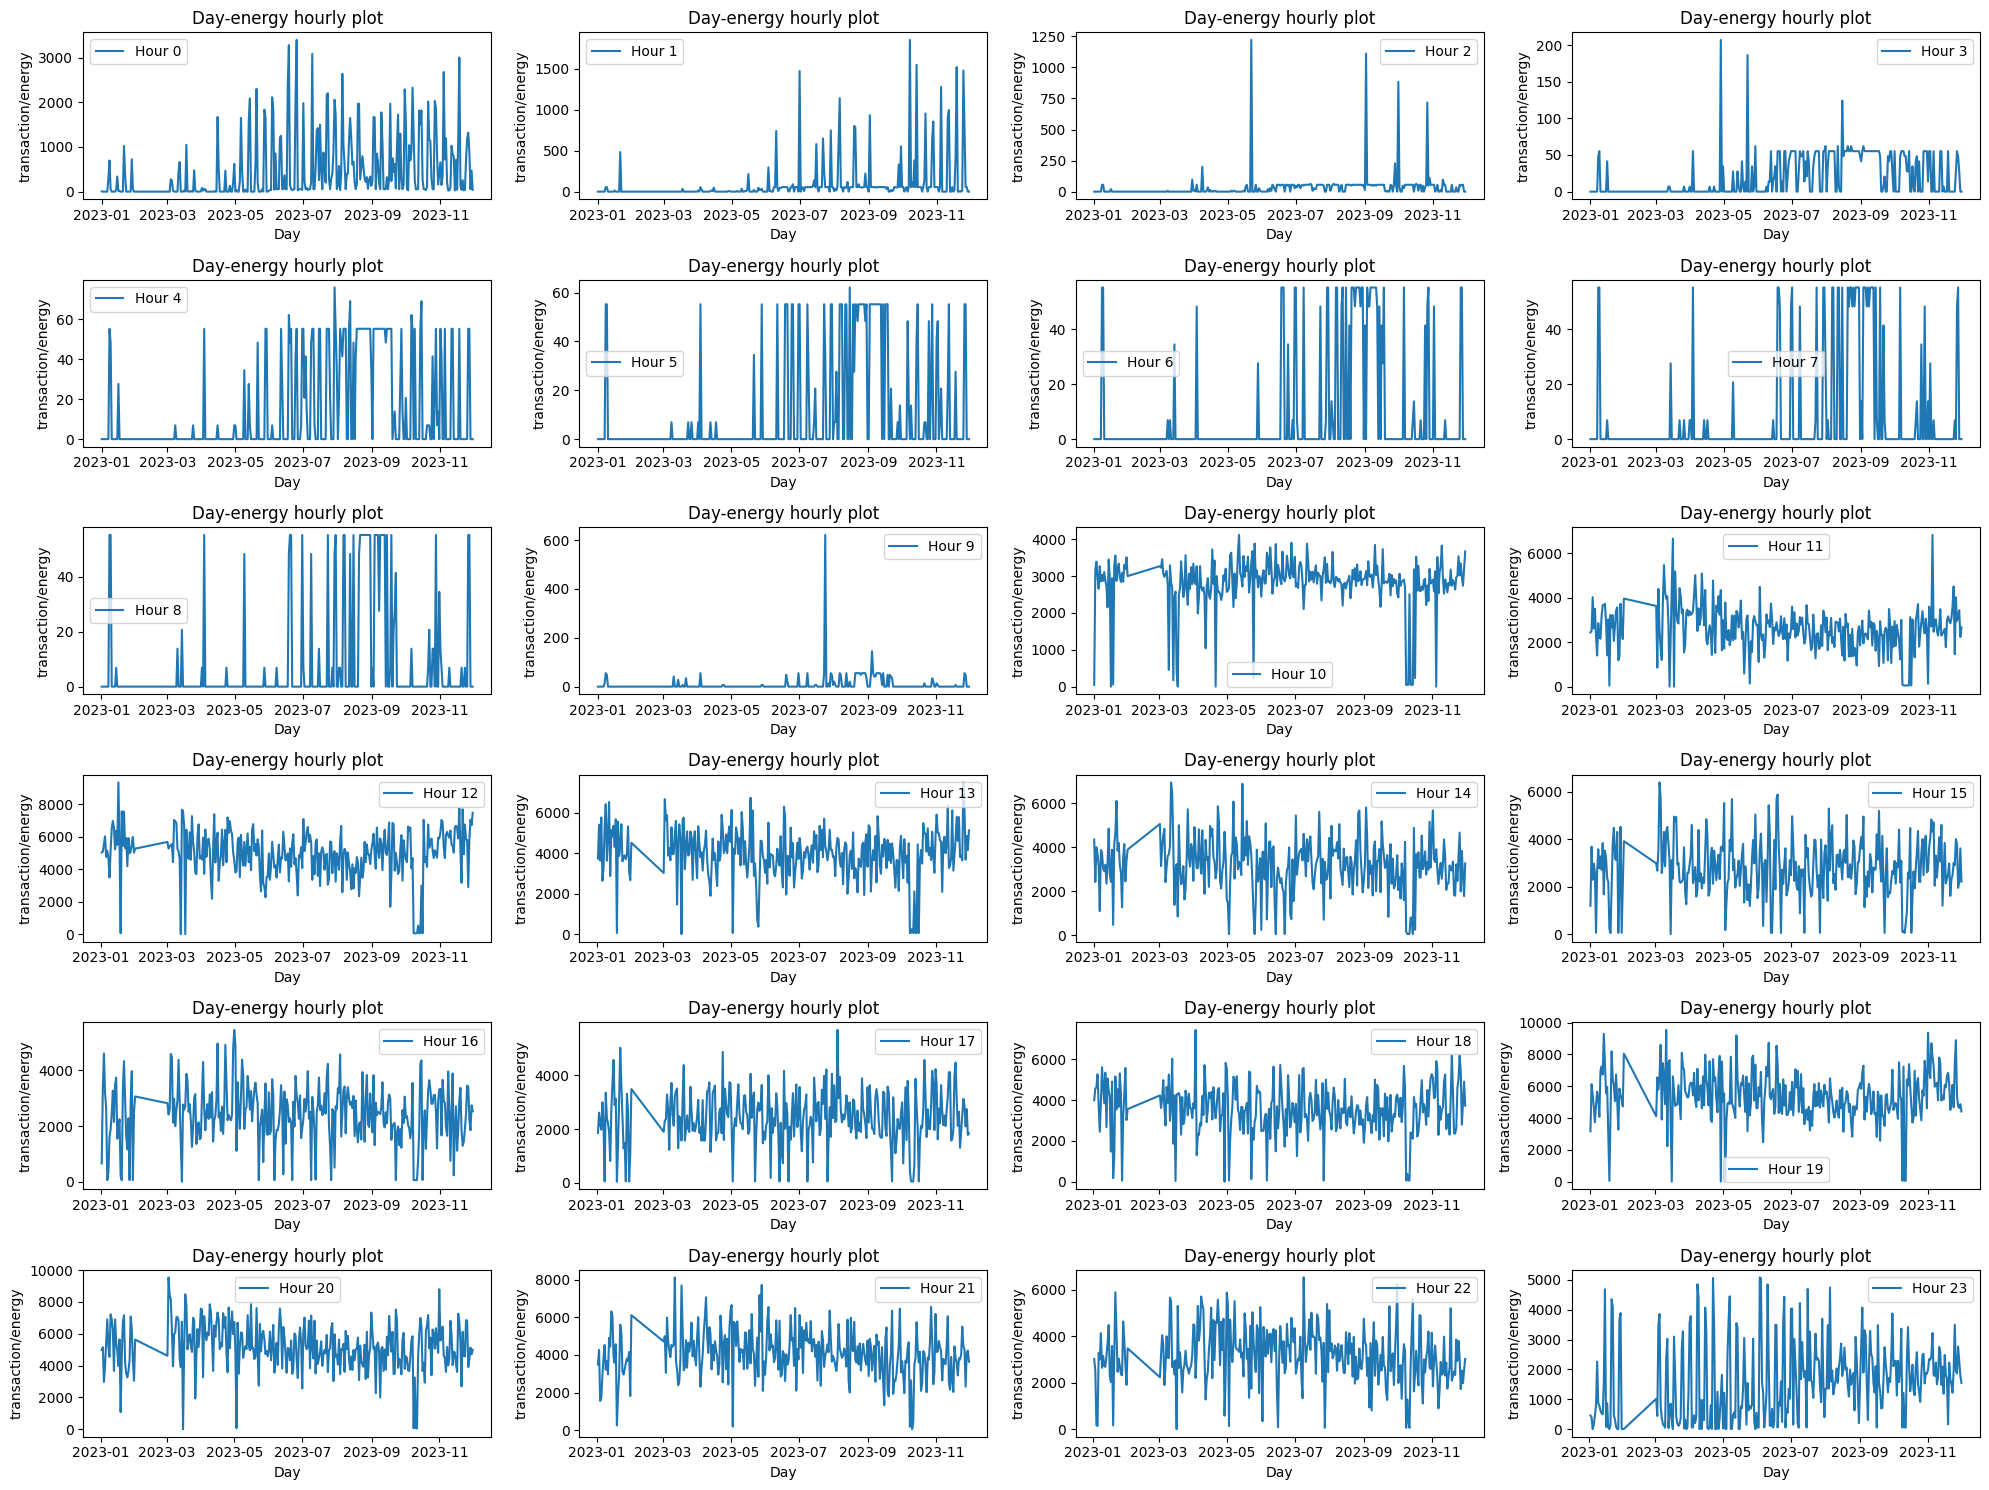

In [24]:
import matplotlib.pyplot as plt

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Friteuse Frites 1 (Wh)'],
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


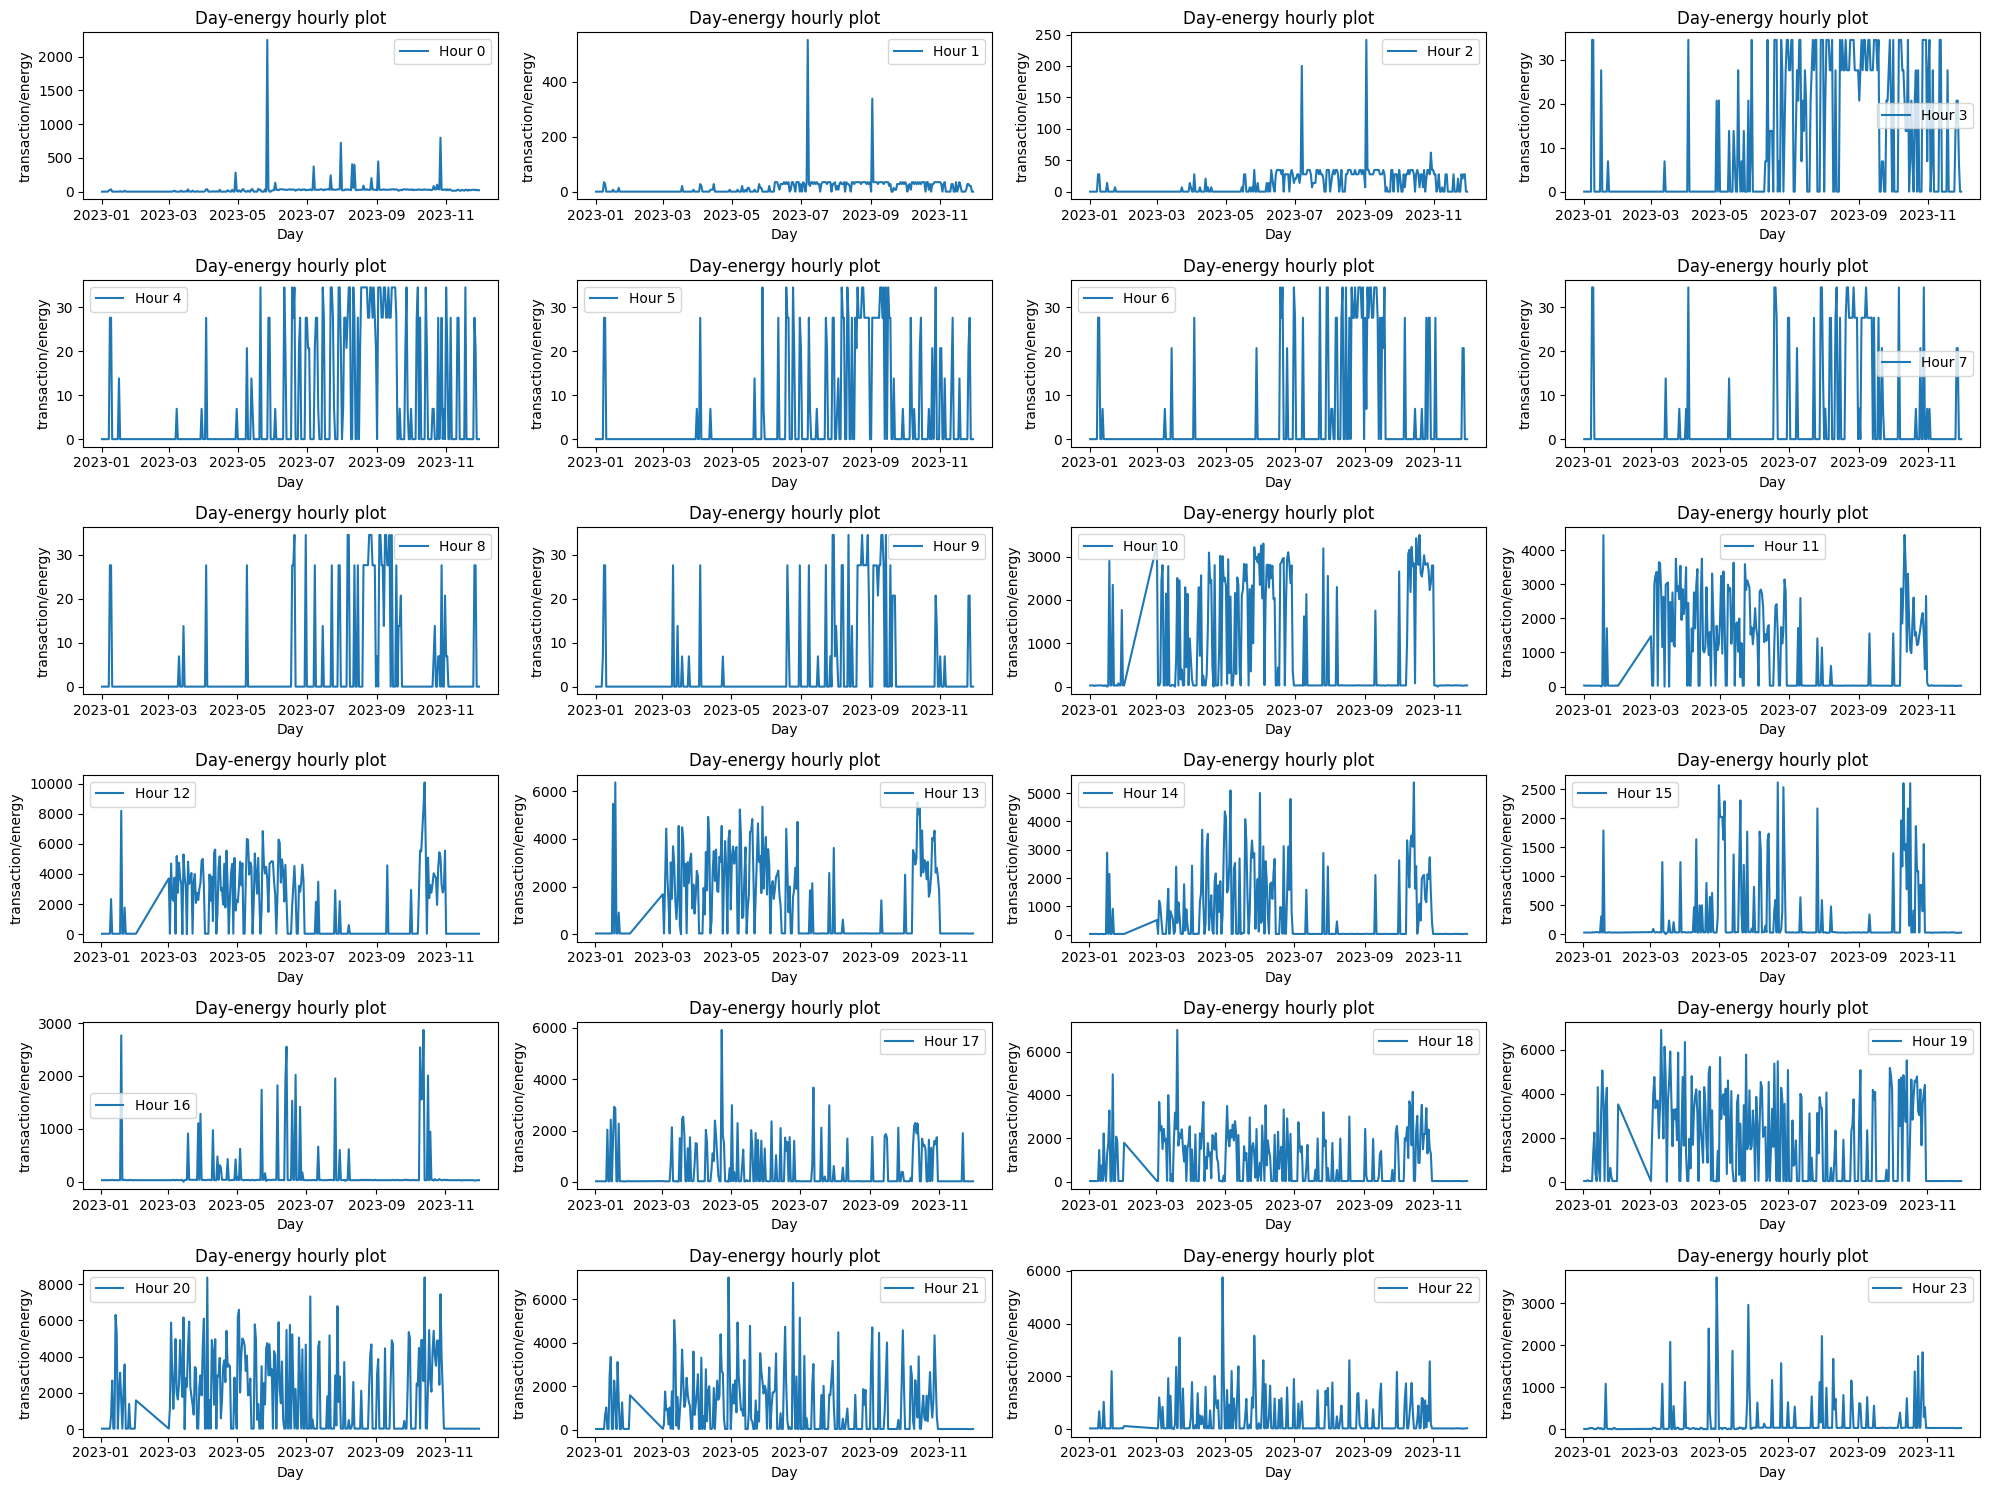

In [22]:
import matplotlib.pyplot as plt

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Friteuse Frites 2 (Wh)'],
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


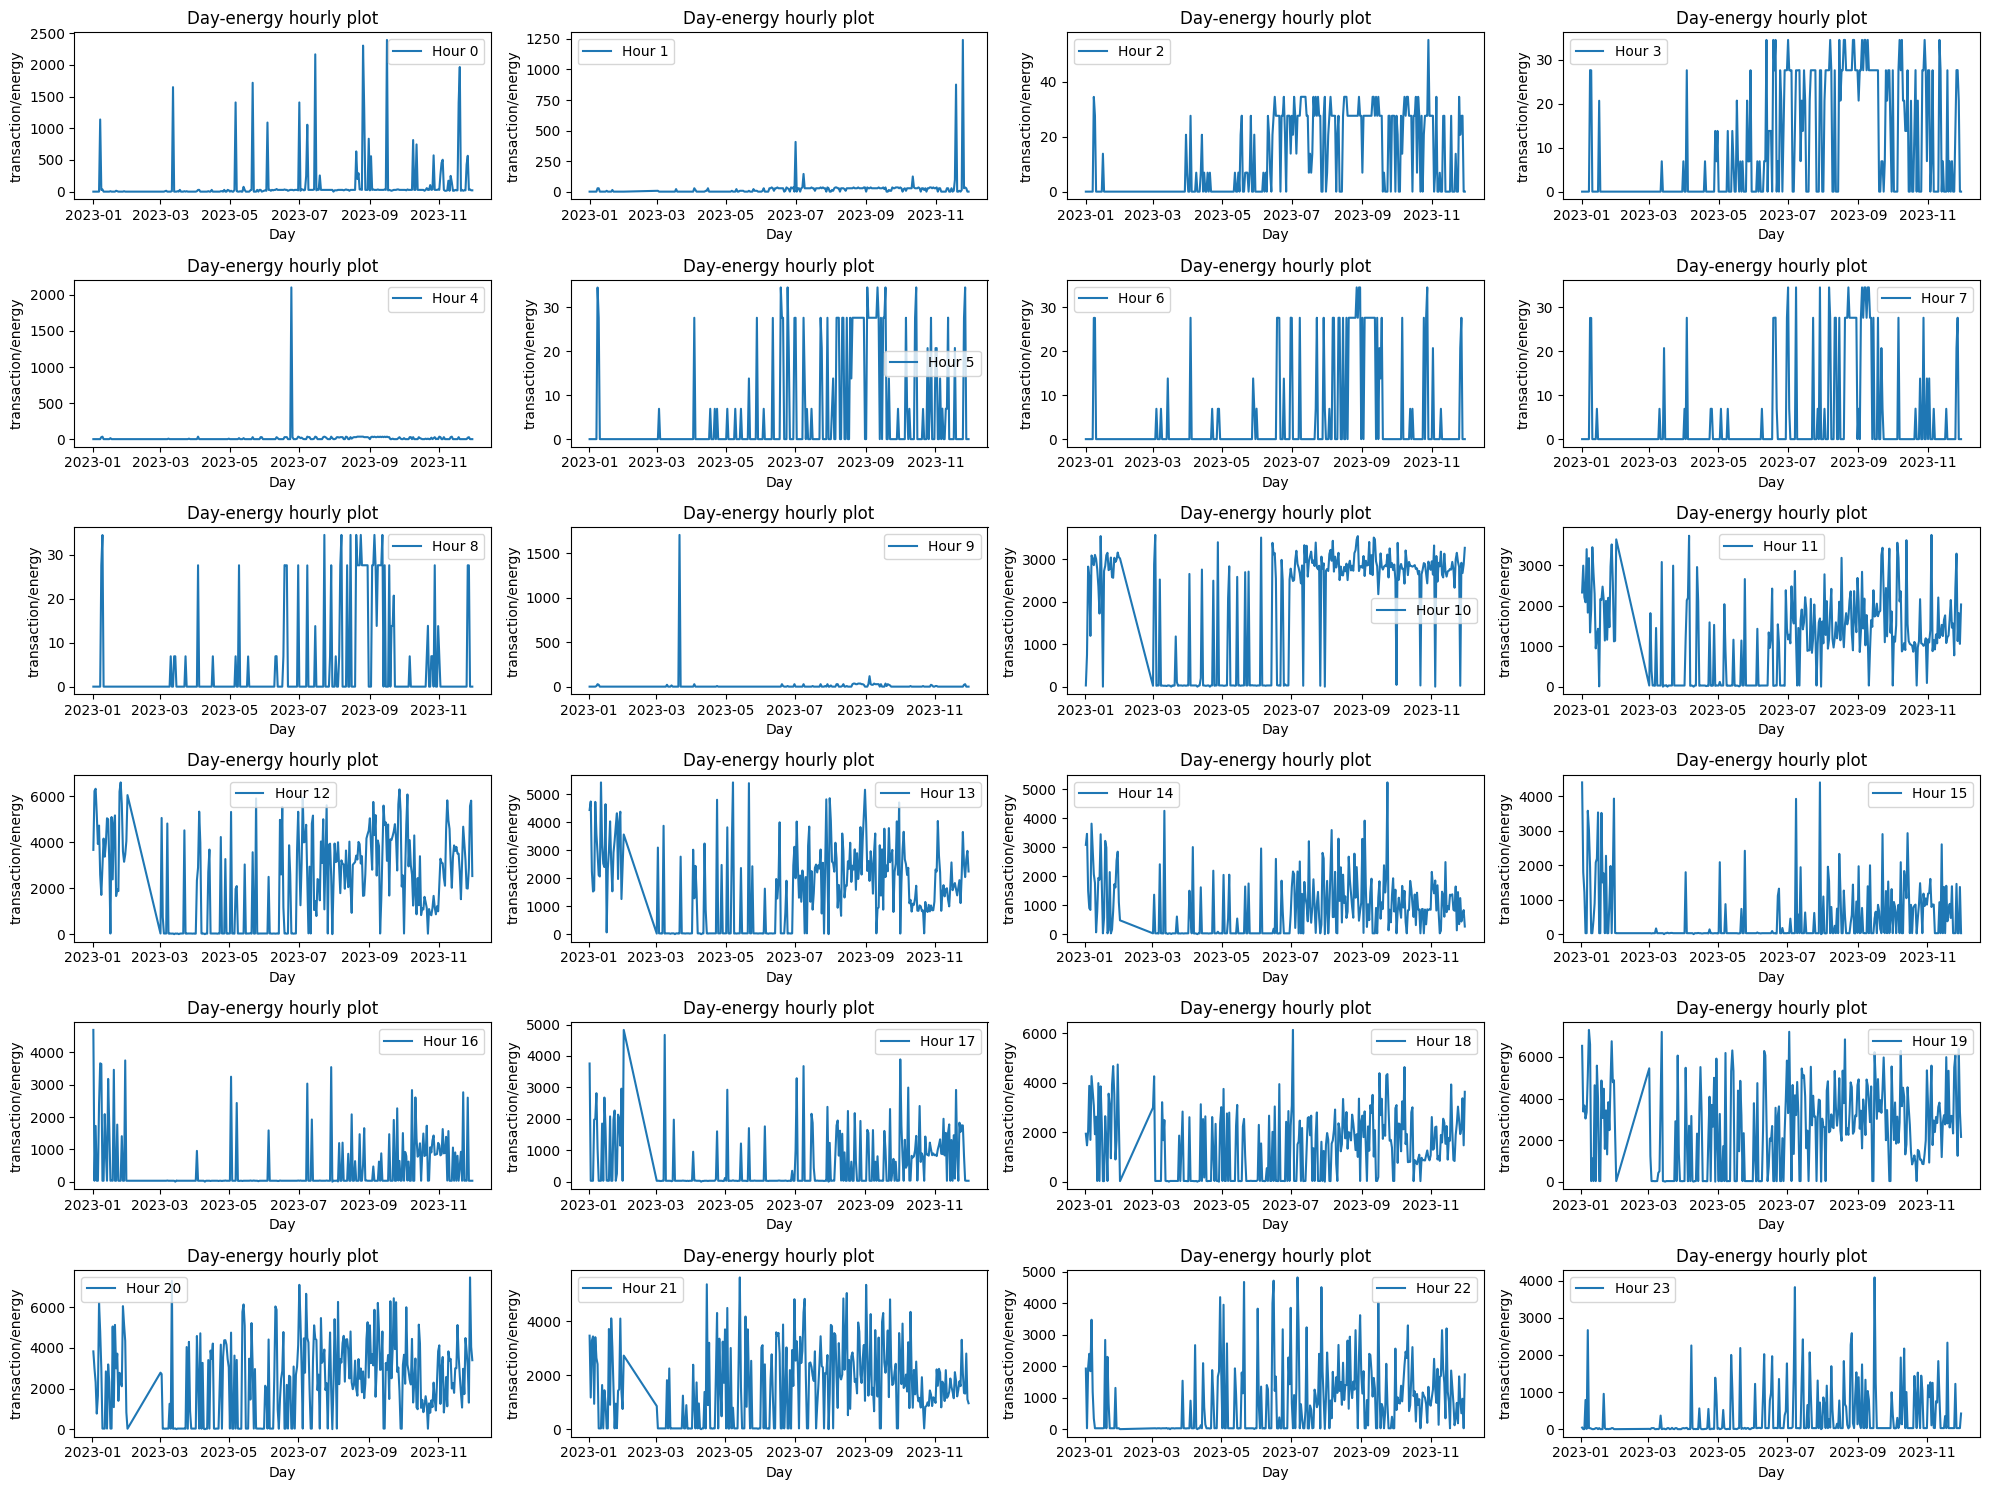

In [23]:
import matplotlib.pyplot as plt

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Friteuse Frites 3 (Wh)'],
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [80]:
np.where(sub_datasets[10]['Friteuse Frites 3 (Wh)']<(0.64*sub_datasets[10]['Friteuse Frites 3 (Wh)'].mean()))

(array([  0,   1,  15,  31,  34,  35,  36,  38,  39,  40,  41,  42,  43,
         44,  45,  46,  47,  48,  49,  50,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  70,  71,
         72,  73,  75,  76,  77,  78,  79,  80,  81,  82,  83,  85,  86,
         87,  89,  90,  91,  92,  93,  94,  95,  96,  99, 100, 101, 102,
        103, 104, 106, 107, 108, 109, 110, 111, 113, 114, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 140, 141, 142, 143, 146, 147, 148, 149, 150, 163,
        178, 182, 245, 266, 279, 301]),)

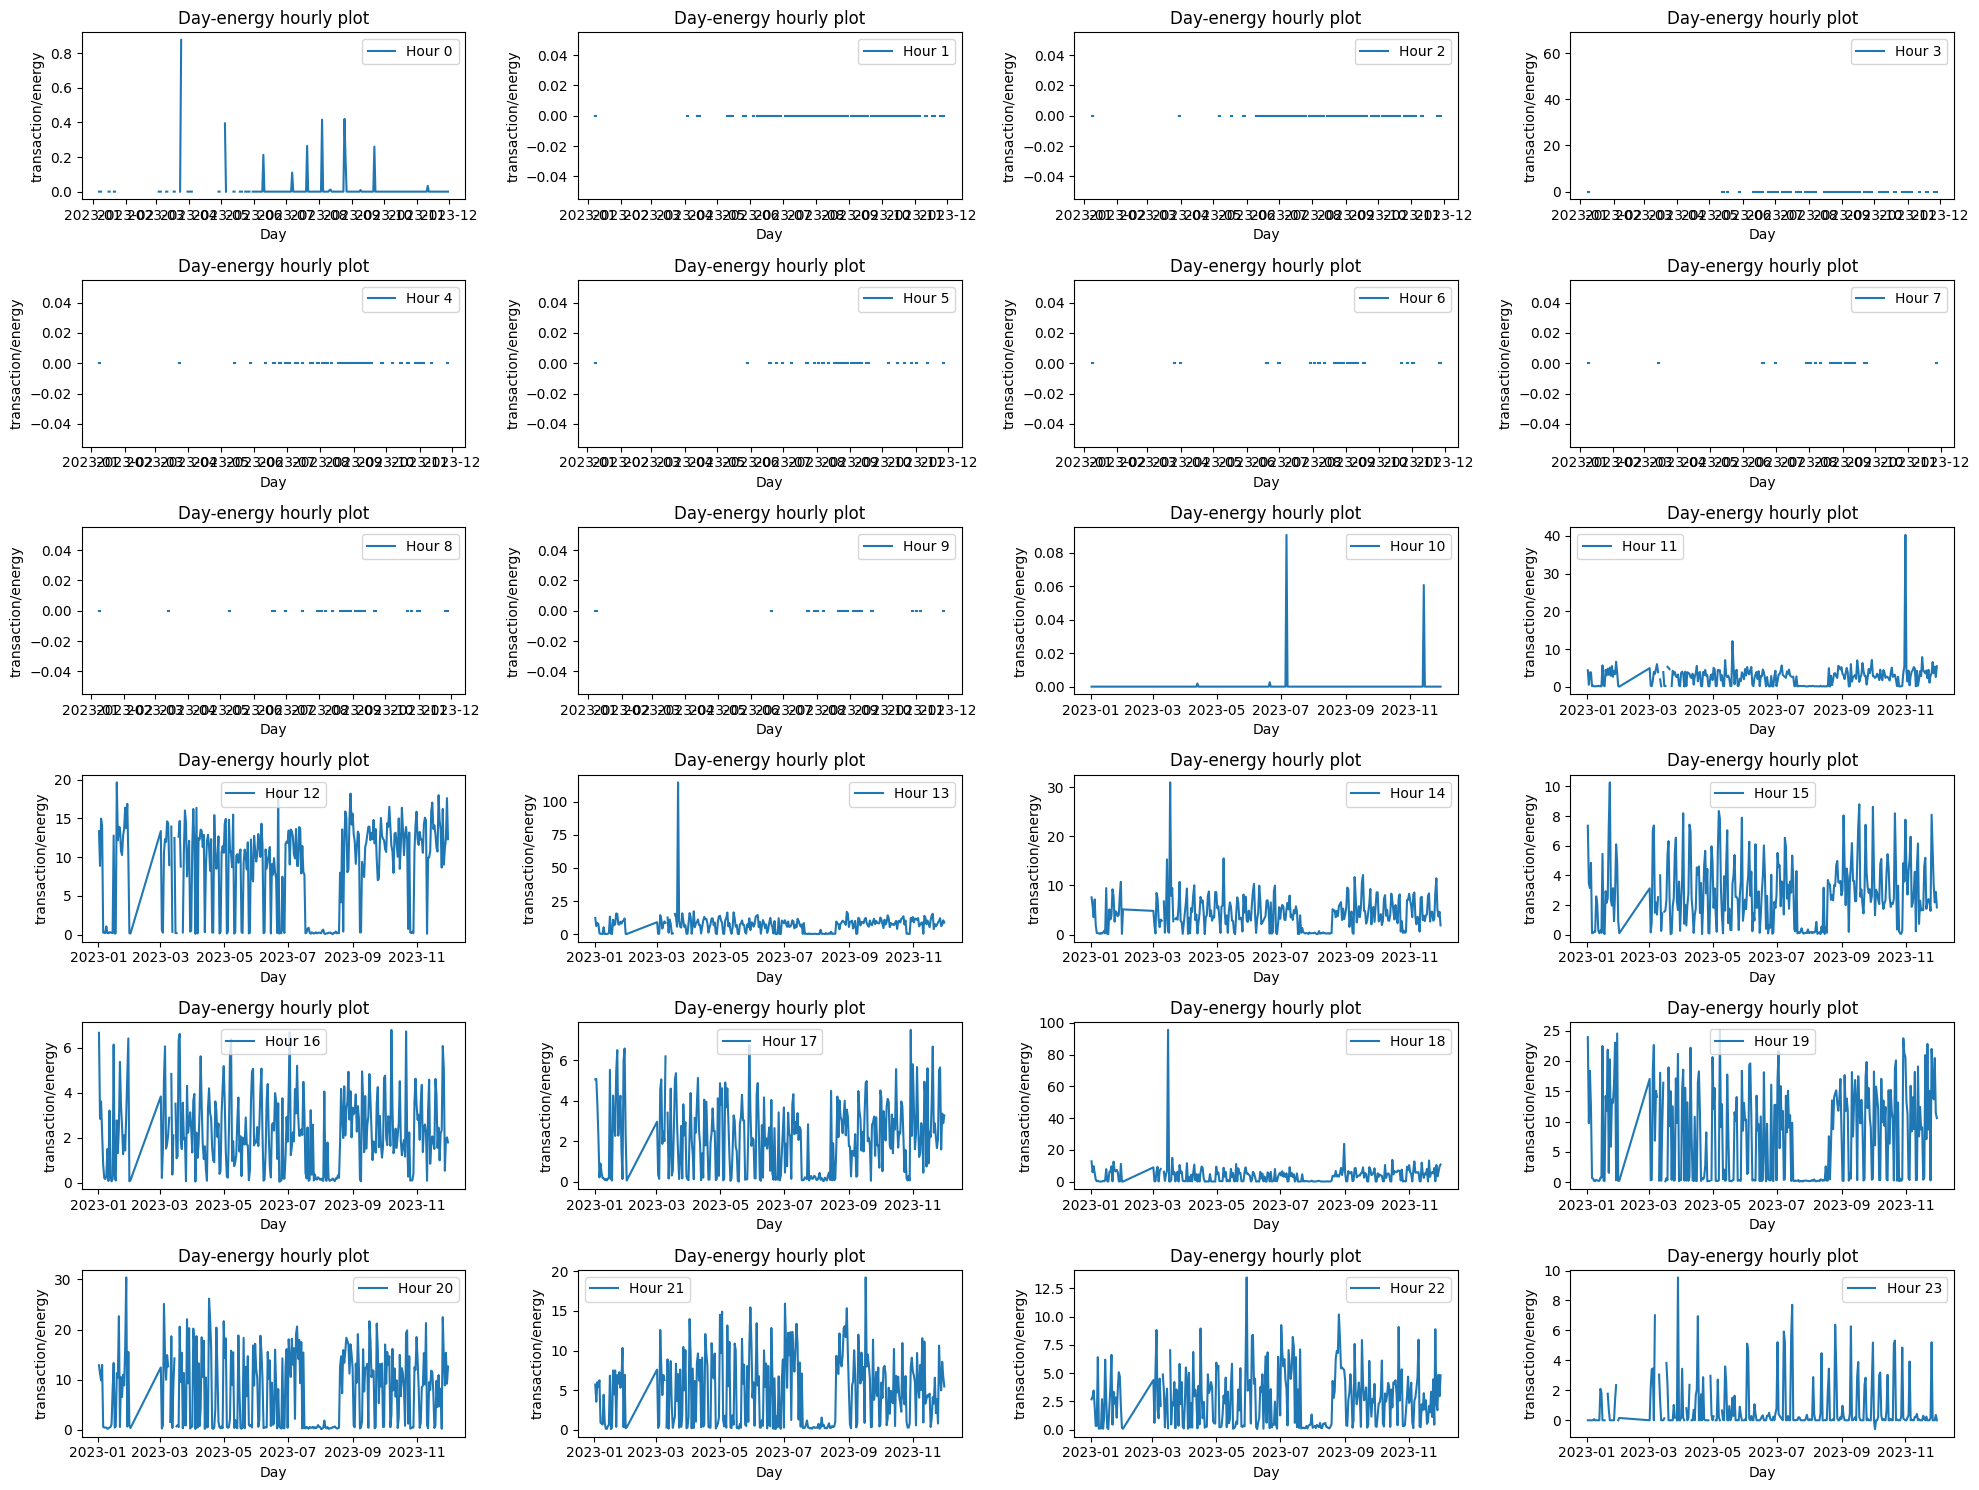

In [25]:
import matplotlib.pyplot as plt

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Transaction'] / sub_df['Friteuse HP Poulet 1 (Wh)'],
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


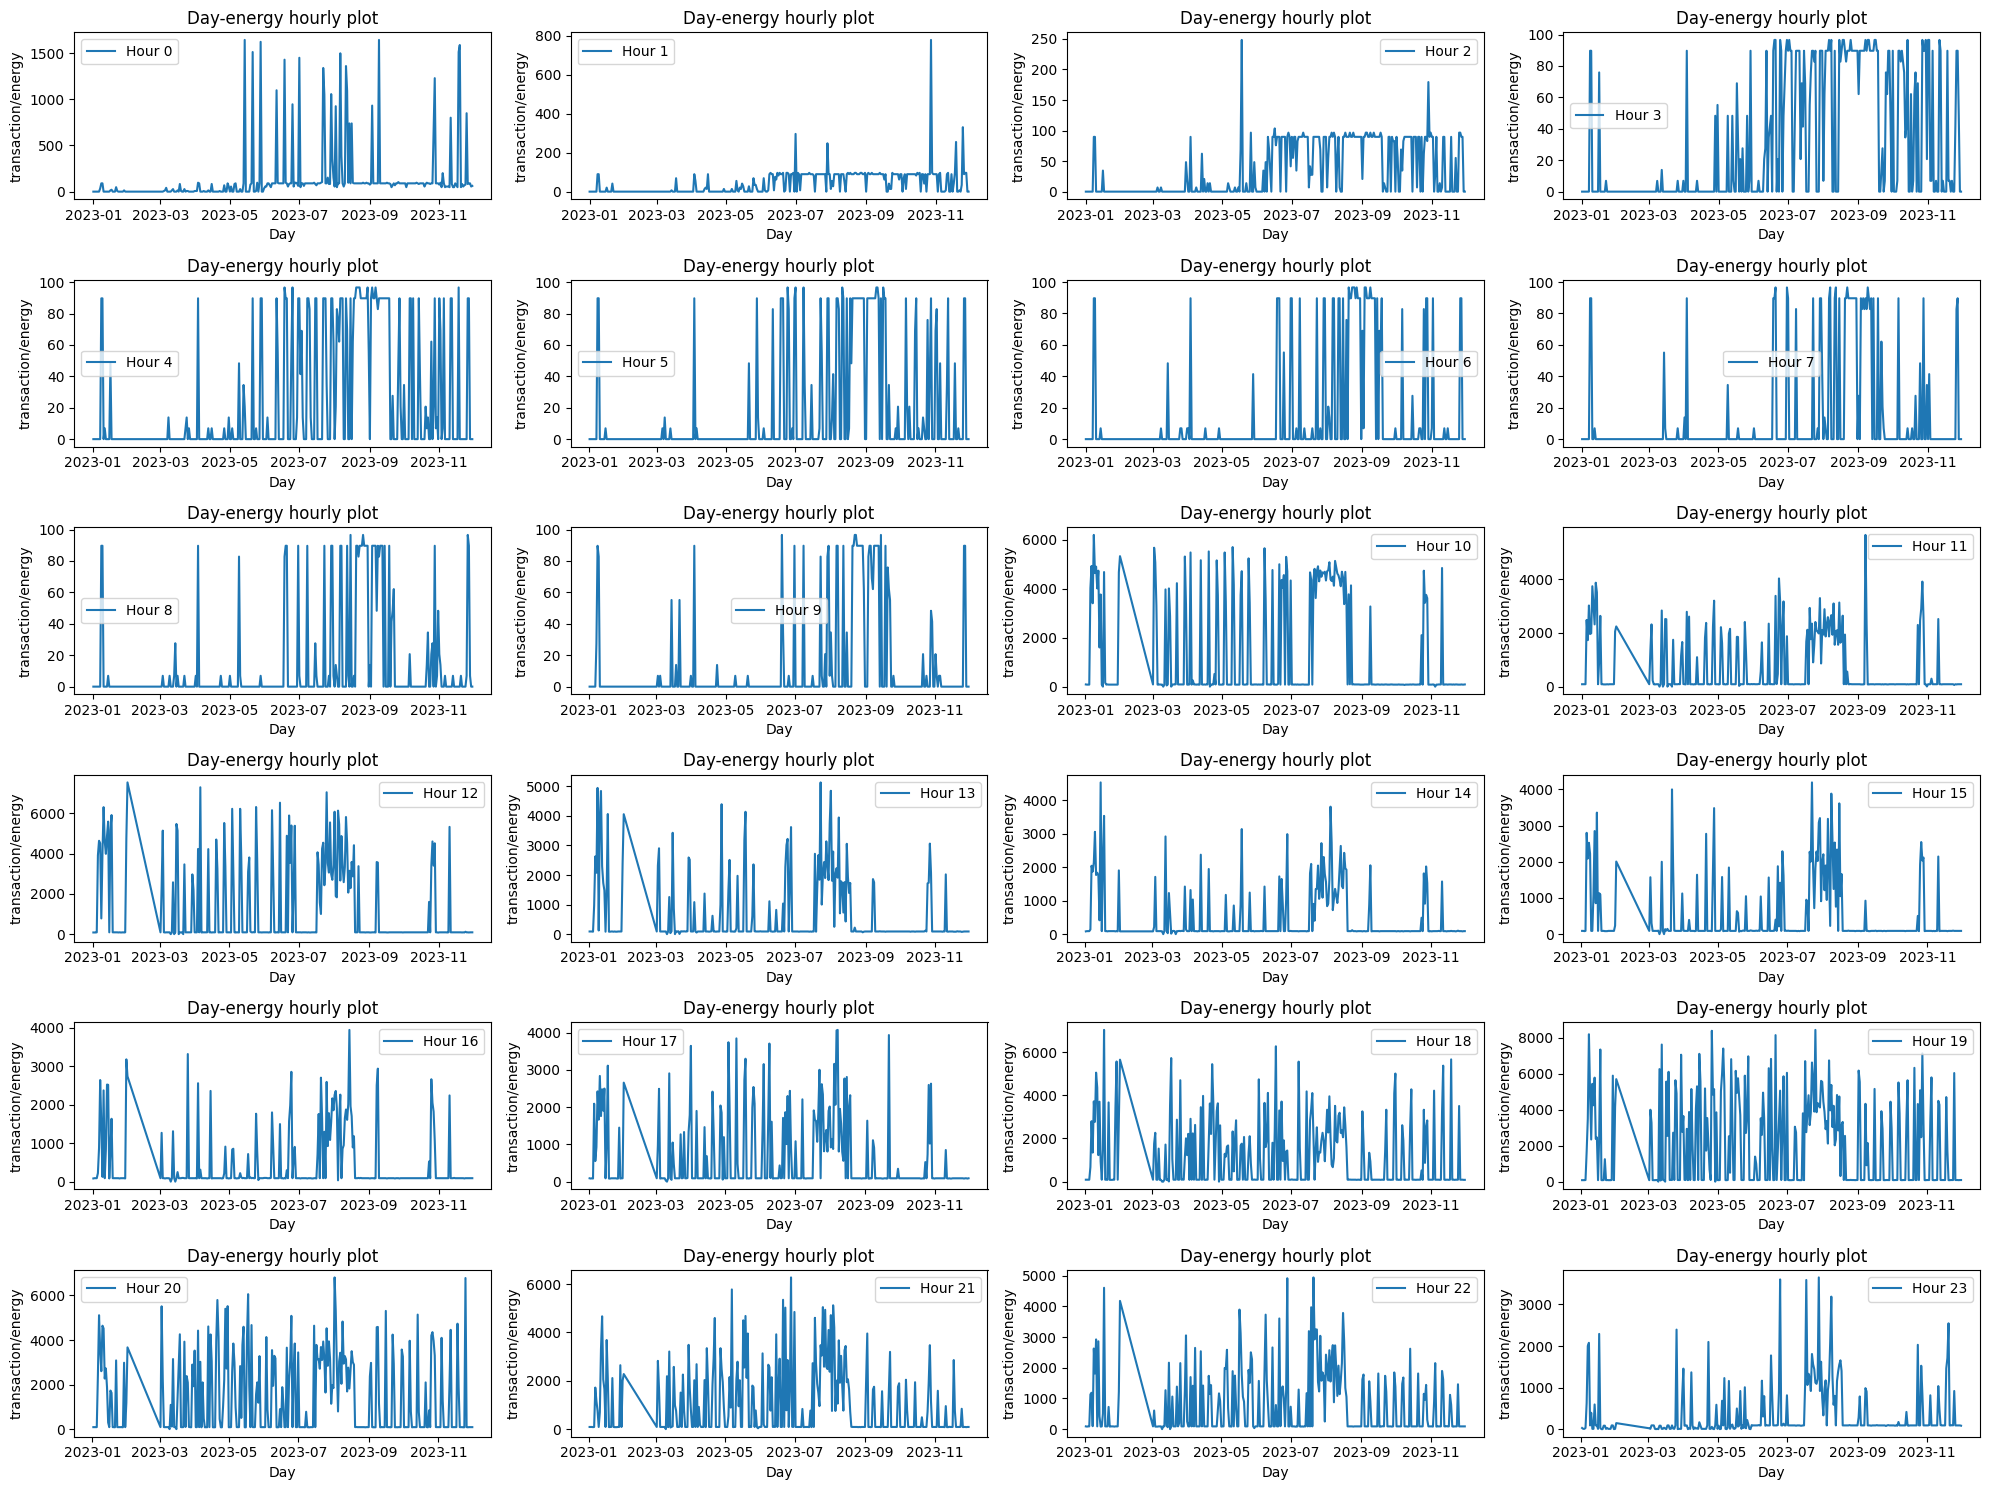

In [99]:

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Friteuse HP Poulet 1 (Wh)'],
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


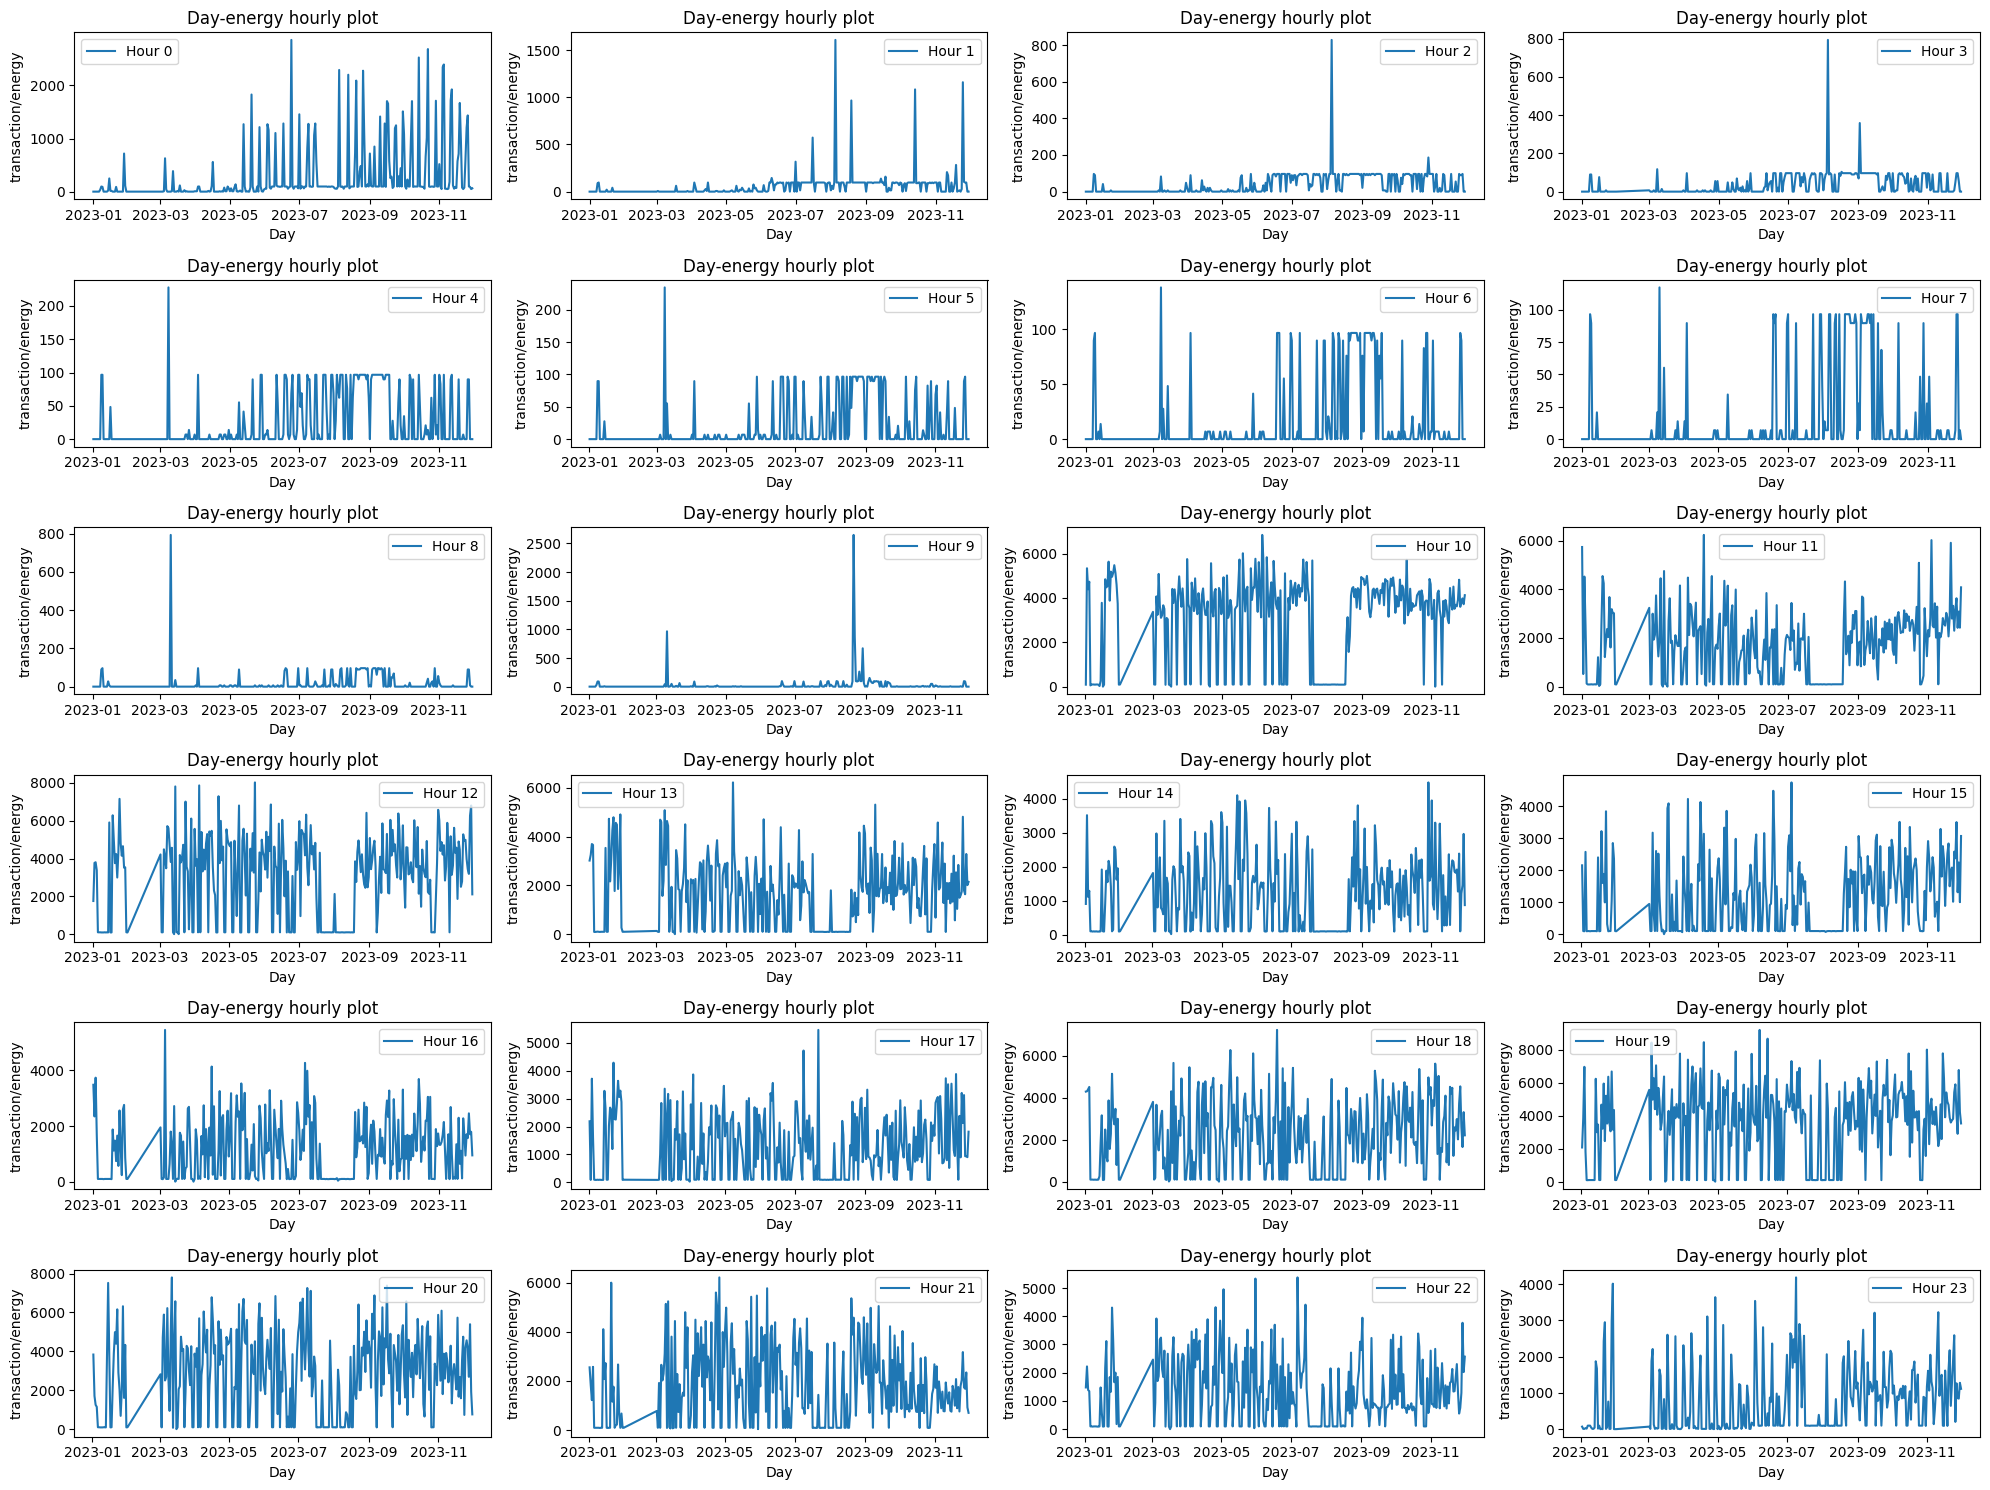

In [100]:

# Assuming sub_datasets is a list of DataFrames

# Calculate the number of subplots needed
num_plots = 24
num_rows = 6
num_cols = 4

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over sub_datasets and plot on each subplot
for i, sub_df in enumerate(sub_datasets, start=1):
    ax = axes[i - 1]
    ax.plot(sub_df['DateTime'], sub_df['Friteuse HP Poulet 2 (Wh)'],
            label=f'Hour {i - 1}')
    ax.set_xlabel('Day')  # Adjust x-axis label as needed
    ax.set_ylabel('transaction/energy')  # Adjust y-axis label as needed
    ax.set_title('Day-energy hourly plot')  # Adjust title as needed
    ax.legend()  # Show legend with labels for each subset

# Hide any extra subplot
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# recommend machine open sitation based on transaction

In [47]:
sub_datasets[13]

DateTime  Transaction  Maintien au chaud HC1 (Wh)  \
13   2023-01-01 13:00:00      1107.39                      549.63   
37   2023-01-02 13:00:00       551.23                      646.24   
61   2023-01-03 13:00:00       769.45                      648.53   
85   2023-01-04 13:00:00       639.17                      609.43   
109  2023-01-05 13:00:00       750.66                      639.38   
...                  ...          ...                         ...   
7237 2023-11-26 13:00:00      1089.04                     1345.50   
7261 2023-11-27 13:00:00       546.59                     1228.20   
7285 2023-11-28 13:00:00       652.59                     1122.40   
7309 2023-11-29 13:00:00       944.75                     1239.70   
7333 2023-11-30 13:00:00       789.16                     1347.80   

      Friteuse Fish (Wh)  Friteuse HP Poulet 2 (Wh)  \
13                1083.3                     3015.3   
37                1041.9                     3249.9   
61                1104.0                     3691.5   
85                1138.5                     3657.0   
109                897.0                       89.7   
...                  ...                        ...   
7237                55.2                     1794.0   
7261               897.0                     1635.3   
7285               779.7                     3284.4   
7309               883.2                     2007.9   
7333              1297.2                     2139.0   

      Friteuse HP Poulet 1 (Wh)  Friteuse Poulet 3 (Wh)  \
13                         89.7                 3567.30   
37                         89.7                 5319.60   
61                         89.7                 4622.85   
85                         82.8                 2656.26   
109                       972.9                 1490.31   
...                         ...                     ...   
7237                       89.7                 2642.70   
7261                       89.7                   41.43   
7285                       89.7                 3891.60   
7309                       89.7                 1676.70   
7333                       89.7                 2256.27   

      Friteuse Frites 1 (Wh)  Inconnu et négligeable (Wh)  \
13                   3739.56                          0.0   
37                   5416.32                          0.0   
61                   3636.12                          0.0   
85                   5775.30                          0.0   
109                  2642.70                          0.0   
...                      ...                          ...   
7237                 6092.70                          0.0   
7261                 3691.50                          0.0   
7285                 4857.60                          0.0   
7309                 4160.70                          0.0   
7333                 5133.60                          0.0   

      Friteuse Poulet 5 (Wh)  Friteuse Frites 3 (Wh)  Four Cookies (Wh)  \
13                   4360.80                 4443.60              124.2   
37                   6430.83                 4747.20             2435.7   
61                      6.90                 2249.40              124.2   
85                      0.00                 1524.90              124.2   
109                     0.00                 1566.30              124.2   
...                      ...                     ...                ...   
7237                    0.00                 2497.83              124.2   
7261                    0.00                 2042.40              124.2   
7285                    0.00                 2677.20              124.2   
7309                    0.00                 2980.80              124.2   
7333                    0.00                 2242.50              124.2   

      Friteuse Poulet 4 (Wh)  Friteuse Frites 2 (Wh)  
13                       0.0                    27.6  
37                       0.0                    27.6  
61                

In [55]:
fr_1_idx = np.where(sub_datasets[10]['Friteuse Frites 1 (Wh)']<sub_datasets[10]["Friteuse Frites 1 (Wh)"].mean()-np.sqrt(sub_datasets[10]["Friteuse Frites 1 (Wh)"].var()))
#print(list(fr_1_idx[0]))
print(sub_datasets[11]['Transaction'].iloc[fr_1_idx[0]].mean())

278.23263157894735


In [56]:
fr_1_idx = np.where(sub_datasets[11]['Friteuse Frites 1 (Wh)']<sub_datasets[11]["Friteuse Frites 1 (Wh)"].mean()
                    -np.sqrt(sub_datasets[11]["Friteuse Frites 1 (Wh)"].var()))
#print(list(fr_1_idx[0]))
print(sub_datasets[12]['Transaction'].iloc[fr_1_idx[0]].mean())

1056.6809756097562


In [101]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse Frites 1 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse Frites 1 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse Frites 1 should be checked when its energy consumption is higher than  800.0355725490195
 For hour1, Friteuse Frites 1 should be checked when its energy consumption is higher than  168.00079607843136
 For hour2, Friteuse Frites 1 should be checked when its energy consumption is higher than  62.941752941176475
 For hour3, Friteuse Frites 1 should be checked when its energy consumption is higher than  35.760360784313725
 For hour4, Friteuse Frites 1 should be checked when its energy consumption is higher than  26.107192156862745
 For hour5, Friteuse Frites 1 should be checked when its energy consumption is higher than  19.37756470588235
 For hour6, Friteuse Frites 1 should be checked when its energy consumption is higher than  15.236082352941176
 For hour7, Friteuse Frites 1 should be checked when its energy consumption is higher than  14.38521176470588
 For hour8, Friteuse Frites 1 should be checked when its energy consumption is higher than  13.978909803921567
 For

In [62]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Frites 1 (Wh)']<(sub_datasets[i]["Friteuse Frites 1 (Wh)"].mean()-np.sqrt(sub_datasets[i]["Friteuse Frites 1 (Wh)"].var())))
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())

In [63]:
for i in range(10,23):
    print(f" For hour{i}, Friteuse Frites 1 should close or run at a low power when the transaction is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Frites 1 should close or run at a low power when the transaction is under  278.23263157894735
 For hour11, Friteuse Frites 1 should close or run at a low power when the transaction is under  1056.6809756097562
 For hour12, Friteuse Frites 1 should close or run at a low power when the transaction is under  715.0475
 For hour13, Friteuse Frites 1 should close or run at a low power when the transaction is under  394.77611111111105
 For hour14, Friteuse Frites 1 should close or run at a low power when the transaction is under  241.37743589743587
 For hour15, Friteuse Frites 1 should close or run at a low power when the transaction is under  219.53473684210525
 For hour16, Friteuse Frites 1 should close or run at a low power when the transaction is under  275.60275
 For hour17, Friteuse Frites 1 should close or run at a low power when the transaction is under  473.94303030303035
 For hour18, Friteuse Frites 1 should close or run at a low power when the transaction is u

In [96]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Frites 1 (Wh)']<0.64*sub_datasets[i]["Friteuse Frites 1 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Frites 1 should close or run at a low power when the transaction of hour {i} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Frites 1 should close or run at a low power when the transaction of hour 10 is under  0.0
 For hour11, Friteuse Frites 1 should close or run at a low power when the transaction of hour 11 is under  273.6002173913043
 For hour12, Friteuse Frites 1 should close or run at a low power when the transaction of hour 12 is under  930.8133333333334
 For hour13, Friteuse Frites 1 should close or run at a low power when the transaction of hour 13 is under  707.2576666666666
 For hour14, Friteuse Frites 1 should close or run at a low power when the transaction of hour 14 is under  434.51204545454544
 For hour15, Friteuse Frites 1 should close or run at a low power when the transaction of hour 15 is under  248.55938775510205
 For hour16, Friteuse Frites 1 should close or run at a low power when the transaction of hour 16 is under  222.9808163265306
 For hour17, Friteuse Frites 1 should close or run at a low power when the transaction of hour 17 is under  249.25
 For hour18, Fr

In [97]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Frites 2 (Wh)']<0.64*sub_datasets[i]["Friteuse Frites 2 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Frites 2 should close or run at a low power when the transaction of hour {i} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Frites 2 should close or run at a low power when the transaction of hour 10 is under  0.11431372549019608
 For hour11, Friteuse Frites 2 should close or run at a low power when the transaction of hour 11 is under  308.8432222222222
 For hour12, Friteuse Frites 2 should close or run at a low power when the transaction of hour 12 is under  1043.2127528089886
 For hour13, Friteuse Frites 2 should close or run at a low power when the transaction of hour 13 is under  772.7690555555555
 For hour14, Friteuse Frites 2 should close or run at a low power when the transaction of hour 14 is under  444.3352153110048
 For hour15, Friteuse Frites 2 should close or run at a low power when the transaction of hour 15 is under  308.4274493927125
 For hour16, Friteuse Frites 2 should close or run at a low power when the transaction of hour 16 is under  250.52423913043478
 For hour17, Friteuse Frites 2 should close or run at a low power when the transaction of hour 17 is under  270.16

In [98]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Frites 3 (Wh)']<0.64*sub_datasets[i]["Friteuse Frites 3 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Frites 3 should close or run at a low power when the transaction of hour {i} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Frites 3 should close or run at a low power when the transaction of hour 10 is under  0.20827272727272728
 For hour11, Friteuse Frites 3 should close or run at a low power when the transaction of hour 11 is under  310.2014285714286
 For hour12, Friteuse Frites 3 should close or run at a low power when the transaction of hour 12 is under  1041.1357142857144
 For hour13, Friteuse Frites 3 should close or run at a low power when the transaction of hour 13 is under  796.3593700787403
 For hour14, Friteuse Frites 3 should close or run at a low power when the transaction of hour 14 is under  453.1728187919463
 For hour15, Friteuse Frites 3 should close or run at a low power when the transaction of hour 15 is under  292.24692307692305
 For hour16, Friteuse Frites 3 should close or run at a low power when the transaction of hour 16 is under  245.68991416309012
 For hour17, Friteuse Frites 3 should close or run at a low power when the transaction of hour 17 is under  254.4

In [87]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Fish (Wh)']<0.64*sub_datasets[i]["Friteuse Fish (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Fish should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Fish should close or run at a low power when the transaction of hour 11 is under  290.15941176470585
 For hour11, Friteuse Fish should close or run at a low power when the transaction of hour 12 is under  1046.7384615384615
 For hour12, Friteuse Fish should close or run at a low power when the transaction of hour 13 is under  690.3766666666667
 For hour13, Friteuse Fish should close or run at a low power when the transaction of hour 14 is under  441.765
 For hour14, Friteuse Fish should close or run at a low power when the transaction of hour 15 is under  298.60454545454553
 For hour15, Friteuse Fish should close or run at a low power when the transaction of hour 16 is under  259.83583333333337
 For hour16, Friteuse Fish should close or run at a low power when the transaction of hour 17 is under  254.6511764705882
 For hour17, Friteuse Fish should close or run at a low power when the transaction of hour 18 is under  520.4341666666666
 For hour18, Friteuse Fish sho

In [88]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse HP Poulet 1 (Wh)']<0.64*sub_datasets[i]["Friteuse HP Poulet 1 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 11 is under  311.8734090909091
 For hour11, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 12 is under  1067.9427649769584
 For hour12, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 13 is under  818.0051598173516
 For hour13, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 14 is under  468.75864628820966
 For hour14, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 15 is under  319.6647008547008
 For hour15, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 16 is under  251.35527426160337
 For hour16, Friteuse HP Poulet 1 should close or run at a low power when the transaction of hour 17 is under  269.01193277310927
 For hour17, Friteuse HP Poulet 1 should close or run at a low power when the transaction of 

In [89]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse HP Poulet 2 (Wh)']<0.64*sub_datasets[i]["Friteuse HP Poulet 2 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 11 is under  290.57109756097566
 For hour11, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 12 is under  1001.1019444444444
 For hour12, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 13 is under  740.3947916666667
 For hour13, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 14 is under  416.8273275862068
 For hour14, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 15 is under  277.20492187499997
 For hour15, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 16 is under  241.1082481751825
 For hour16, Friteuse HP Poulet 2 should close or run at a low power when the transaction of hour 17 is under  245.65570370370372
 For hour17, Friteuse HP Poulet 2 should close or run at a low power when the transaction of 

In [90]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Poulet 3 (Wh)']<0.64*sub_datasets[i]["Friteuse Poulet 3 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Poulet 3 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 11 is under  280.46500000000003
 For hour11, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 12 is under  991.0223636363637
 For hour12, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 13 is under  751.7431914893618
 For hour13, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 14 is under  398.3424657534247
 For hour14, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 15 is under  266.46252525252527
 For hour15, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 16 is under  238.03869999999998
 For hour16, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 17 is under  252.5303
 For hour17, Friteuse Poulet 3 should close or run at a low power when the transaction of hour 18 is under  495.079892473118

In [91]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Poulet 4 (Wh)']<0.64*sub_datasets[i]["Friteuse Poulet 4 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Poulet 4 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 11 is under  298.88980392156867
 For hour11, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 12 is under  1026.2088235294116
 For hour12, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 13 is under  818.5565079365081
 For hour13, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 14 is under  467.3328712871287
 For hour14, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 15 is under  291.8603846153846
 For hour15, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 16 is under  247.32898305084743
 For hour16, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 17 is under  270.029
 For hour17, Friteuse Poulet 4 should close or run at a low power when the transaction of hour 18 is under  531.1151428571429

In [92]:
mean_transaction_target = [] 
for i in range(10,23):
    idx = np.where(sub_datasets[i]['Friteuse Poulet 5 (Wh)']<0.64*sub_datasets[i]["Friteuse Poulet 5 (Wh)"].mean())
    mean_transaction_target.append(sub_datasets[i+1]['Transaction'].iloc[idx[0]].mean())
for i in range(10,23):
    print(f" For hour{i}, Friteuse Poulet 5 should close or run at a low power when the transaction of hour {i+1} is under ", mean_transaction_target[i-10])

 For hour10, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 11 is under  310.13202334630347
 For hour11, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 12 is under  1052.2204705882352
 For hour12, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 13 is under  782.4886872586873
 For hour13, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 14 is under  448.12488372093026
 For hour14, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 15 is under  299.2147674418605
 For hour15, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 16 is under  242.066953125
 For hour16, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 17 is under  257.10128
 For hour17, Friteuse Poulet 5 should close or run at a low power when the transaction of hour 18 is under  515.4054128440367
 

# --------------------------------------------------

In [102]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse Frites 1 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse Frites 1 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse Frites 1 should be checked when its energy consumption is higher than  800.0355725490195
 For hour1, Friteuse Frites 1 should be checked when its energy consumption is higher than  168.00079607843136
 For hour2, Friteuse Frites 1 should be checked when its energy consumption is higher than  62.941752941176475
 For hour3, Friteuse Frites 1 should be checked when its energy consumption is higher than  35.760360784313725
 For hour4, Friteuse Frites 1 should be checked when its energy consumption is higher than  26.107192156862745
 For hour5, Friteuse Frites 1 should be checked when its energy consumption is higher than  19.37756470588235
 For hour6, Friteuse Frites 1 should be checked when its energy consumption is higher than  15.236082352941176
 For hour7, Friteuse Frites 1 should be checked when its energy consumption is higher than  14.38521176470588
 For hour8, Friteuse Frites 1 should be checked when its energy consumption is higher than  13.978909803921567
 For

In [103]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse Frites 2 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse Frites 1 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse Frites 1 should be checked when its energy consumption is higher than  64.27031372549018
 For hour1, Friteuse Frites 1 should be checked when its energy consumption is higher than  29.251972549019598
 For hour2, Friteuse Frites 1 should be checked when its energy consumption is higher than  24.221513725490194
 For hour3, Friteuse Frites 1 should be checked when its energy consumption is higher than  19.155039215686273
 For hour4, Friteuse Frites 1 should be checked when its energy consumption is higher than  14.386980392156863
 For hour5, Friteuse Frites 1 should be checked when its energy consumption is higher than  10.095003921568628
 For hour6, Friteuse Frites 1 should be checked when its energy consumption is higher than  8.800850980392156
 For hour7, Friteuse Frites 1 should be checked when its energy consumption is higher than  7.655423529411764
 For hour8, Friteuse Frites 1 should be checked when its energy consumption is higher than  7.470360784313726
 For 

In [104]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse Frites 3 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse Frites 3 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse Frites 3 should be checked when its energy consumption is higher than  181.056
 For hour1, Friteuse Frites 3 should be checked when its energy consumption is higher than  37.79203137254902
 For hour2, Friteuse Frites 3 should be checked when its energy consumption is higher than  21.33849019607843
 For hour3, Friteuse Frites 3 should be checked when its energy consumption is higher than  17.750588235294117
 For hour4, Friteuse Frites 3 should be checked when its energy consumption is higher than  24.924462745098037
 For hour5, Friteuse Frites 3 should be checked when its energy consumption is higher than  10.095325490196078
 For hour6, Friteuse Frites 3 should be checked when its energy consumption is higher than  8.061243137254902
 For hour7, Friteuse Frites 3 should be checked when its energy consumption is higher than  7.765560784313726
 For hour8, Friteuse Frites 3 should be checked when its energy consumption is higher than  7.432254901960785
 For hour9, Frite

In [105]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse Fish (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse Frites 1 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse Frites 1 should be checked when its energy consumption is higher than  351.9407843137255
 For hour1, Friteuse Frites 1 should be checked when its energy consumption is higher than  121.44280392156861
 For hour2, Friteuse Frites 1 should be checked when its energy consumption is higher than  68.3773882352941
 For hour3, Friteuse Frites 1 should be checked when its energy consumption is higher than  47.74216862745097
 For hour4, Friteuse Frites 1 should be checked when its energy consumption is higher than  32.35752156862745
 For hour5, Friteuse Frites 1 should be checked when its energy consumption is higher than  23.111298039215683
 For hour6, Friteuse Frites 1 should be checked when its energy consumption is higher than  18.896819607843135
 For hour7, Friteuse Frites 1 should be checked when its energy consumption is higher than  17.26952156862745
 For hour8, Friteuse Frites 1 should be checked when its energy consumption is higher than  17.417443137254903
 For ho

In [106]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse HP Poulet 1 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  239.66831372549015
 For hour1, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  79.7659019607843
 For hour2, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  66.41726666666668
 For hour3, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  55.655329411764704
 For hour4, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  42.157164705882344
 For hour5, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  31.7668
 For hour6, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  26.07053333333333
 For hour7, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  23.777749019607842
 For hour8, Friteuse HP Poulet 1 should be checked when its energy consumption is higher than  23.14988

In [107]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse HP Poulet 2 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than  472.42627843137245
 For hour1, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than  106.31750196078428
 For hour2, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than  73.8504862745098
 For hour3, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than  64.2355843137255
 For hour4, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than  46.26359607843137
 For hour5, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than  35.352611764705884
 For hour6, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than  28.54805882352941
 For hour7, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than  26.366054901960783
 For hour8, Friteuse HP Poulet 2 should be checked when its energy consumption is higher than 

In [108]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse Poulet 3 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse Poulet 3 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse Poulet 3 should be checked when its energy consumption is higher than  136.2349607843137
 For hour1, Friteuse Poulet 3 should be checked when its energy consumption is higher than  159.16360784313724
 For hour2, Friteuse Poulet 3 should be checked when its energy consumption is higher than  166.74394509803923
 For hour3, Friteuse Poulet 3 should be checked when its energy consumption is higher than  95.59399215686275
 For hour4, Friteuse Poulet 3 should be checked when its energy consumption is higher than  40.050086274509795
 For hour5, Friteuse Poulet 3 should be checked when its energy consumption is higher than  5.767815686274508
 For hour6, Friteuse Poulet 3 should be checked when its energy consumption is higher than  4.548749019607843
 For hour7, Friteuse Poulet 3 should be checked when its energy consumption is higher than  4.400666666666667
 For hour8, Friteuse Poulet 3 should be checked when its energy consumption is higher than  4.474305882352941
 For ho

In [109]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse Poulet 4 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse Poulet 4 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse Poulet 4 should be checked when its energy consumption is higher than  287.33812941176467
 For hour1, Friteuse Poulet 4 should be checked when its energy consumption is higher than  31.617752941176473
 For hour2, Friteuse Poulet 4 should be checked when its energy consumption is higher than  16.826078431372547
 For hour3, Friteuse Poulet 4 should be checked when its energy consumption is higher than  8.690231372549018
 For hour4, Friteuse Poulet 4 should be checked when its energy consumption is higher than  2.403725490196078
 For hour5, Friteuse Poulet 4 should be checked when its energy consumption is higher than  0.22188235294117645
 For hour6, Friteuse Poulet 4 should be checked when its energy consumption is higher than  0.29568235294117645
 For hour7, Friteuse Poulet 4 should be checked when its energy consumption is higher than  0.18490196078431373
 For hour8, Friteuse Poulet 4 should be checked when its energy consumption is higher than  0.07396078431372549

In [112]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Friteuse Poulet 5 (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Friteuse Poulet 5 should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Friteuse Poulet 5 should be checked when its energy consumption is higher than  335.6710196078431
 For hour1, Friteuse Poulet 5 should be checked when its energy consumption is higher than  16.41913333333333
 For hour2, Friteuse Poulet 5 should be checked when its energy consumption is higher than  7.507019607843136
 For hour3, Friteuse Poulet 5 should be checked when its energy consumption is higher than  10.798435294117645
 For hour4, Friteuse Poulet 5 should be checked when its energy consumption is higher than  0.11094117647058824
 For hour5, Friteuse Poulet 5 should be checked when its energy consumption is higher than  0.11094117647058824
 For hour6, Friteuse Poulet 5 should be checked when its energy consumption is higher than  0.036980392156862746
 For hour7, Friteuse Poulet 5 should be checked when its energy consumption is higher than  0.07396078431372549
 For hour8, Friteuse Poulet 5 should be checked when its energy consumption is higher than  0.0
 For hour9, Fr

In [111]:
warning = []
for i in range(0,24):
    warning.append(1.64*sub_datasets[i]["Four Cookies (Wh)"].mean())
for i in range(0,24):
    print(f" For hour{i}, Four Cookies should be checked when its energy consumption is higher than ", warning[i])

 For hour0, Four Cookies should be checked when its energy consumption is higher than  327.2742196078432
 For hour1, Four Cookies should be checked when its energy consumption is higher than  171.07049019607845
 For hour2, Four Cookies should be checked when its energy consumption is higher than  85.27614117647057
 For hour3, Four Cookies should be checked when its energy consumption is higher than  36.90498431372549
 For hour4, Four Cookies should be checked when its energy consumption is higher than  23.666807843137253
 For hour5, Four Cookies should be checked when its energy consumption is higher than  14.34710588235294
 For hour6, Four Cookies should be checked when its energy consumption is higher than  9.688219607843136
 For hour7, Four Cookies should be checked when its energy consumption is higher than  8.874811764705882
 For hour8, Four Cookies should be checked when its energy consumption is higher than  8.801333333333332
 For hour9, Four Cookies should be checked when its e

# --------------------------------------------------


In [43]:
column_values = {}
column_var = {}
# Iterate over sub_datasets
for i, data in enumerate(sub_datasets):
    # Iterate over columns in each dataset
    for c in data.columns[1:]:
        # Generate variable name dynamically
        variable_name = f'{c}'
        # Store column values in the dictionary
        if variable_name not in column_values:
            column_values[variable_name] = []
            column_var[variable_name] = []
        column_values[variable_name].append(data[c].mean())
        column_var[variable_name].append(data[c].var())

In [65]:
mean_MAC = column_values['Maintien au chaud HC1 (Wh)']
mean_FISH = column_values['Friteuse Fish (Wh)']
mean_FRITES1 = column_values['Friteuse Frites 1 (Wh)']
mean_FRITES2 = column_values['Friteuse Frites 2 (Wh)']
mean_FRITES3 = column_values['Friteuse Frites 3 (Wh)']
mean_HP_POULET1 = column_values['Friteuse HP Poulet 1 (Wh)']
mean_HP_POULET2 = column_values['Friteuse HP Poulet 2 (Wh)']
mean_POULET3 = column_values['Friteuse Poulet 3 (Wh)'] 
mean_POULET4 = column_values['Friteuse Poulet 4 (Wh)'] 
mean_POULET5 = column_values['Friteuse Poulet 5 (Wh)']
mean_COOKIES = column_values['Four Cookies (Wh)']

In [66]:
var_MAC = column_var['Maintien au chaud HC1 (Wh)']
var_FISH = column_var['Friteuse Fish (Wh)']
var_FRITES1 = column_var['Friteuse Frites 1 (Wh)']
var_FRITES2 = column_var['Friteuse Frites 2 (Wh)']
var_FRITES3 = column_var['Friteuse Frites 3 (Wh)']
var_HP_POULET1 = column_var['Friteuse HP Poulet 1 (Wh)']
var_HP_POULET2 = column_var['Friteuse HP Poulet 2 (Wh)']
var_POULET3 = column_var['Friteuse Poulet 3 (Wh)']
var_POULET4 = column_var['Friteuse Poulet 4 (Wh)']
var_POULET5 = column_var['Friteuse Poulet 5 (Wh)']
var_COOKIES = column_var['Four Cookies (Wh)']

In [67]:
abnormal_idx_MAC = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_MAC[i] = np.where((data['Maintien au chaud HC1 (Wh)']-mean_MAC[i])>np.sqrt(var_MAC[i]))


In [87]:
energy_over_consumption_MAC = 0
for key,a in abnormal_idx_MAC.items():
    subset_data = sub_datasets[key]['Maintien au chaud HC1 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_MAC += np.sum(v) - len(v)*mean_MAC[key]
print(energy_over_consumption_MAC)


368031.3684640522


Do the same to the other variables

In [97]:
# Initialize variables to hold the energy over-consumption for each category
energy_over_consumption_FISH = 0
energy_over_consumption_FRITES1 = 0
energy_over_consumption_FRITES2 = 0
energy_over_consumption_FRITES3 = 0
energy_over_consumption_HP_POULET1 = 0
energy_over_consumption_HP_POULET2 = 0
energy_over_consumption_POULET3 = 0
energy_over_consumption_POULET4 = 0
energy_over_consumption_POULET5 = 0
energy_over_consumption_COOKIES = 0
################################################
abnormal_idx_FISH = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_FISH[i] = np.where((data['Friteuse Fish (Wh)']-mean_FISH[i])>np.sqrt(var_FISH[i]))

energy_over_consumption_FISH = 0
for key,a in abnormal_idx_FISH.items():
    subset_data = sub_datasets[key]['Friteuse Fish (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_FISH += np.sum(v) - len(v)*mean_FISH[key]
print("energy_over_consumption_FISH :",energy_over_consumption_FISH)
################################################
abnormal_idx_FRITES1 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_FRITES1[i] = np.where((data['Friteuse Frites 1 (Wh)']-mean_FRITES1[i])>np.sqrt(var_FRITES1[i]))

energy_over_consumption_FRITES1 = 0
for key,a in abnormal_idx_FRITES1.items():
    subset_data = sub_datasets[key]['Friteuse Frites 1 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_FRITES1 += np.sum(v) - len(v)*mean_FRITES1[key]
print("energy_over_consumption_FRITES1: ",energy_over_consumption_FRITES1)
################################################
abnormal_idx_FRITES2 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_FRITES2[i] = np.where((data['Friteuse Frites 2 (Wh)']-mean_FRITES2[i])>np.sqrt(var_FRITES2[i]))

energy_over_consumption_FRITES2 = 0
for key,a in abnormal_idx_FRITES2.items():
    subset_data = sub_datasets[key]['Friteuse Frites 2 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_FRITES2 += np.sum(v) - len(v)*mean_FRITES2[key]
print("energy_over_consumption_FRITES2: ",energy_over_consumption_FRITES2)
################################################
abnormal_idx_FRITES3 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_FRITES3[i] = np.where((data['Friteuse Frites 3 (Wh)']-mean_FRITES3[i])>np.sqrt(var_FRITES3[i]))

energy_over_consumption_FRITES3 = 0
for key,a in abnormal_idx_FRITES3.items():
    subset_data = sub_datasets[key]['Friteuse Frites 3 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_FRITES3 += np.sum(v) - len(v)*mean_FRITES3[key]
print("energy_over_consumption_FRITES3: ",energy_over_consumption_FRITES3)
################################################
abnormal_idx_HP_POULET1 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_HP_POULET1[i] = np.where((data['Friteuse HP Poulet 1 (Wh)']-mean_HP_POULET1[i])>np.sqrt(var_HP_POULET1[i]))

energy_over_consumption_HP_POULET1 = 0
for key,a in abnormal_idx_HP_POULET1.items():
    subset_data = sub_datasets[key]['Friteuse HP Poulet 1 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_HP_POULET1 += np.sum(v) - len(v)*mean_HP_POULET1[key]
print("energy_over_consumption_HP_POULET1: ",energy_over_consumption_FRITES3)
################################################
abnormal_idx_HP_POULET2 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_HP_POULET2[i] = np.where((data['Friteuse HP Poulet 2 (Wh)']-mean_HP_POULET2[i])>np.sqrt(var_HP_POULET2[i]))

energy_over_consumption_HP_POULET2 = 0
for key,a in abnormal_idx_HP_POULET2.items():
    subset_data = sub_datasets[key]['Friteuse HP Poulet 2 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_HP_POULET2 += np.sum(v) - len(v)*mean_HP_POULET2[key]
print("energy_over_consumption_HP_POULET2: ", energy_over_consumption_HP_POULET2)
################################################
abnormal_idx_POULET3 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_POULET3[i] = np.where((data['Friteuse Poulet 3 (Wh)']-mean_POULET3[i])>np.sqrt(var_POULET3[i]))

energy_over_consumption_POULET3 = 0
for key,a in abnormal_idx_POULET3.items():
    subset_data = sub_datasets[key]['Friteuse Poulet 3 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_POULET3 += np.sum(v) - len(v)*mean_POULET3[key]
print("energy_over_consumption_POULET3: ",energy_over_consumption_POULET3)
################################################
abnormal_idx_POULET4 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_POULET4[i] = np.where((data['Friteuse Poulet 4 (Wh)']-mean_POULET4[i])>np.sqrt(var_POULET4[i]))

energy_over_consumption_POULET4 = 0
for key,a in abnormal_idx_POULET4.items():
    subset_data = sub_datasets[key]['Friteuse Poulet 4 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_POULET4 += np.sum(v) - len(v)*mean_POULET4[key]
print("energy_over_consumption_POULET4: ",energy_over_consumption_POULET4)
################################################
abnormal_idx_POULET5 = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_POULET5[i] = np.where((data['Friteuse Poulet 5 (Wh)']-mean_POULET5[i])>np.sqrt(var_POULET5[i]))

energy_over_consumption_POULET5 = 0
for key,a in abnormal_idx_POULET5.items():
    subset_data = sub_datasets[key]['Friteuse Poulet 5 (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_POULET5 += np.sum(v) - len(v)*mean_POULET5[key]
print("energy_over_consumption_POULET5: ",energy_over_consumption_POULET5)
################################################
abnormal_idx_COOKIES = {}
for i, sub_df in enumerate(sub_datasets):
    data = sub_df
    abnormal_idx_COOKIES[i] = np.where((data['Four Cookies (Wh)']-mean_COOKIES[i])>np.sqrt(var_COOKIES[i]))

energy_over_consumption_COOKIES = 0
for key,a in abnormal_idx_COOKIES.items():
    subset_data = sub_datasets[key]['Four Cookies (Wh)']
    v = subset_data.iloc[a]
    energy_over_consumption_COOKIES += np.sum(v) - len(v)*mean_COOKIES[key]
print("energy_over_consumption_COOKIES",energy_over_consumption_COOKIES)
################################################

energy_over_consumption_FISH : 381021.49009803915
energy_over_consumption_FRITES1:  1265559.3216666668
energy_over_consumption_FRITES2:  1710371.9369607843
energy_over_consumption_FRITES3:  1485353.30627451
energy_over_consumption_HP_POULET1:  1485353.30627451
energy_over_consumption_HP_POULET2:  1704439.950686275
energy_over_consumption_POULET3:  1445412.0866666667
energy_over_consumption_POULET4:  1477060.8124509803
energy_over_consumption_POULET5:  2467852.8810784314
energy_over_consumption_COOKIES 1654594.1835294117


In [99]:
over_energy = [energy_over_consumption_MAC,
energy_over_consumption_FISH,
energy_over_consumption_FRITES1,
energy_over_consumption_FRITES2,
energy_over_consumption_FRITES3,
energy_over_consumption_HP_POULET1,
energy_over_consumption_HP_POULET2,
energy_over_consumption_POULET3,
energy_over_consumption_POULET4,
energy_over_consumption_POULET5,
energy_over_consumption_COOKIES]
over_expense = sum(over_energy)*0.00027

estimate the whole year based on the 10 months:

In [101]:
over_expense*12/10

5046.324493891765

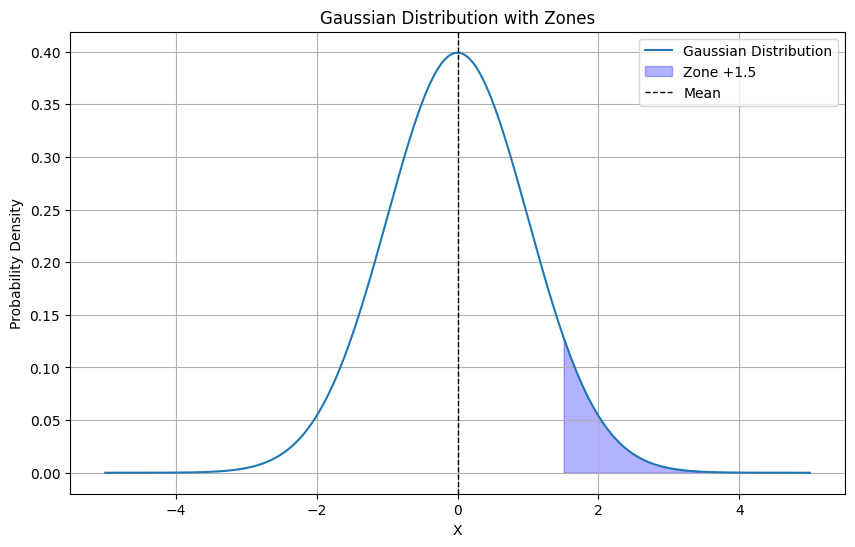

In [89]:
|import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for Gaussian distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate data for the Gaussian distribution
x = np.linspace(-5, 5, 1000)
gaussian = norm.pdf(x, mu, sigma)

# Define the zones
delta = 1.5
zone_lower = mu - delta
zone_upper = mu + delta

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, gaussian, label='Gaussian Distribution')
plt.fill_between(x, 0, gaussian, where=(x >= zone_upper), color='blue', alpha=0.3, label=f'Zone +{delta}')
plt.title('Gaussian Distribution with Zones')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.axvline(x=mu, color='black', linestyle='--', linewidth=1, label='Mean')
plt.legend()
plt.grid(True)
plt.show()


In [107]:
np.mean([0.6905829596412556, 0.7219730941704036, 0.6053811659192825, 0.7432432432432432, 0.7072072072072072])

0.6936775340362784

In [ ]:
a